In [193]:
#Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
#Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Read the Data : csv file

In [195]:

df = pd.read_csv('/kaggle/input/motor-vehicle-collisions-dataset-dasari/Motor_Vehicle_Collisions_-_Crashes.csv')

In [196]:
#Check the Shape ,no  of rows and columns
df.shape

(2081081, 29)

In [288]:
#Print the first 5 rows
df.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
0,2021-09-11,2:39,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,Sedan,Sedan,2021,9,11,NaN
1,2022-03-26,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,...,1,0,Pavement Slippery,NaN,Sedan,NaN,2022,3,26,Road Condition
2,2022-06-29,6:55,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,...,0,0,Following Too Closely,Unspecified,Sedan,Pick-up Truck,2022,6,29,Driver Distraction
3,2021-09-11,9:35,BROOKLYN,11208.0,NaN,NaN,0.0,0.0,0,0,...,0,0,Unspecified,NaN,Sedan,NaN,2021,9,11,Other
4,2021-12-14,8:13,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,...,0,0,NaN,NaN,NaN,NaN,2021,12,14,NaN
5,2021-04-14,12:47,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,0.0,0.0,0,0,...,0,0,Unspecified,Unspecified,Dump,Sedan,2021,4,14,Other
6,2021-12-14,17:05,NaN,NaN,BROOKLYN QUEENS EXPRESSWAY,NaN,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel,2021,12,14,Driver Error
7,2021-12-14,8:17,BRONX,10475.0,NaN,NaN,2.0,0.0,0,0,...,2,0,Unspecified,Unspecified,Sedan,Sedan,2021,12,14,Other
8,2021-12-14,21:10,BROOKLYN,11207.0,NaN,NaN,0.0,0.0,0,0,...,0,0,Driver Inexperience,Unspecified,Sedan,NaN,2021,12,14,Driver Error
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error


# Check for Missing Values

In [198]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
LATITUDE                          234016
LONGITUDE                         234016
LOCATION                          234016
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE COD

In [199]:
# Printing the uniques values in each column
df.nunique()

CRASH DATE                          4306
CRASH TIME                          1440
BOROUGH                                5
ZIP CODE                             426
LATITUDE                          126683
LONGITUDE                          98402
LOCATION                          283890
ON STREET NAME                     18440
CROSS STREET NAME                  20251
OFF STREET NAME                   226869
NUMBER OF PERSONS INJURED             32
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         14
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            31
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
CONTRIBUTING FACTOR VEHICLE 3         51
CONTRIBUTING FACTOR VEHICLE 4         41
CONTRIBUTING FACTOR VEHICLE 5         30
COLLISION_ID                     2081081
VEHICLE TYPE COD

In [200]:
# Splitting the CRASH DATE column into Year, Month, Day 
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
df['Day'] = df['CRASH DATE'].dt.day

# Stats of People Injured -Year Wise

In [201]:
D=df.groupby(['Year'])[['NUMBER OF PERSONS INJURED',
      'NUMBER OF PEDESTRIANS INJURED',
      'NUMBER OF CYCLIST INJURED',
        'NUMBER OF MOTORIST INJURED',]].sum()
D

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
Year,,,,
2012,27453.0,5906,2210,19331
2013,55128.0,11988,4075,39064
2014,51225.0,11036,4000,36178
2015,51358.0,10084,4281,36992
2016,60317.0,11090,4975,44012
2017,60656.0,11151,4889,44615
2018,61941.0,11123,4725,46070
2019,61389.0,10568,4986,45834
2020,44614.0,6691,5576,32347


<Figure size 1500x1000 with 0 Axes>

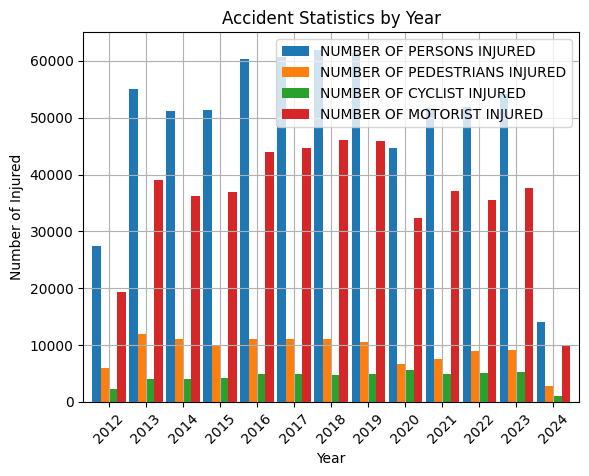

In [202]:
import matplotlib.pyplot as plt

# Plot the DataFrame D
plt.figure(figsize=(15, 10))  # Set the figsize to (12, 8)
D.plot(kind='bar', stacked=False,width=0.9)  # Plot a stacked bar plot
plt.title('Accident Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Number of Injured')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.legend(title='Accident Type')  # Add a legend with a title
plt.grid(True)  # Add gridlines to the plot
plt.show()


# 

<Figure size 3000x2000 with 0 Axes>

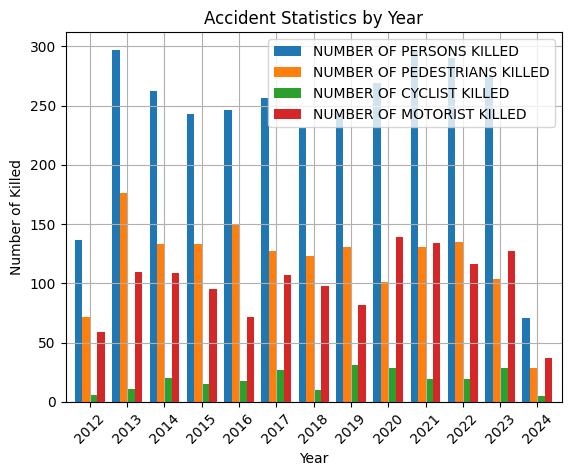

In [203]:
DK=df.groupby(['Year'])[['NUMBER OF PERSONS KILLED',
      'NUMBER OF PEDESTRIANS KILLED',
      'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST KILLED']].sum()
import matplotlib.pyplot as plt

# Plot the DataFrame D
plt.figure(figsize=(30, 20))  # Set the figsize to (12, 8)
DK.plot(kind='bar', stacked=False,width=0.8)  # Plot a stacked bar plot
plt.title('Accident Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Number of Killed')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.legend(title='Accident Type')  # Add a legend with a title
plt.grid(True)  # Add gridlines to the plot
plt.show()


# Month Wise Report of Accidents With Injured & Killed Stats

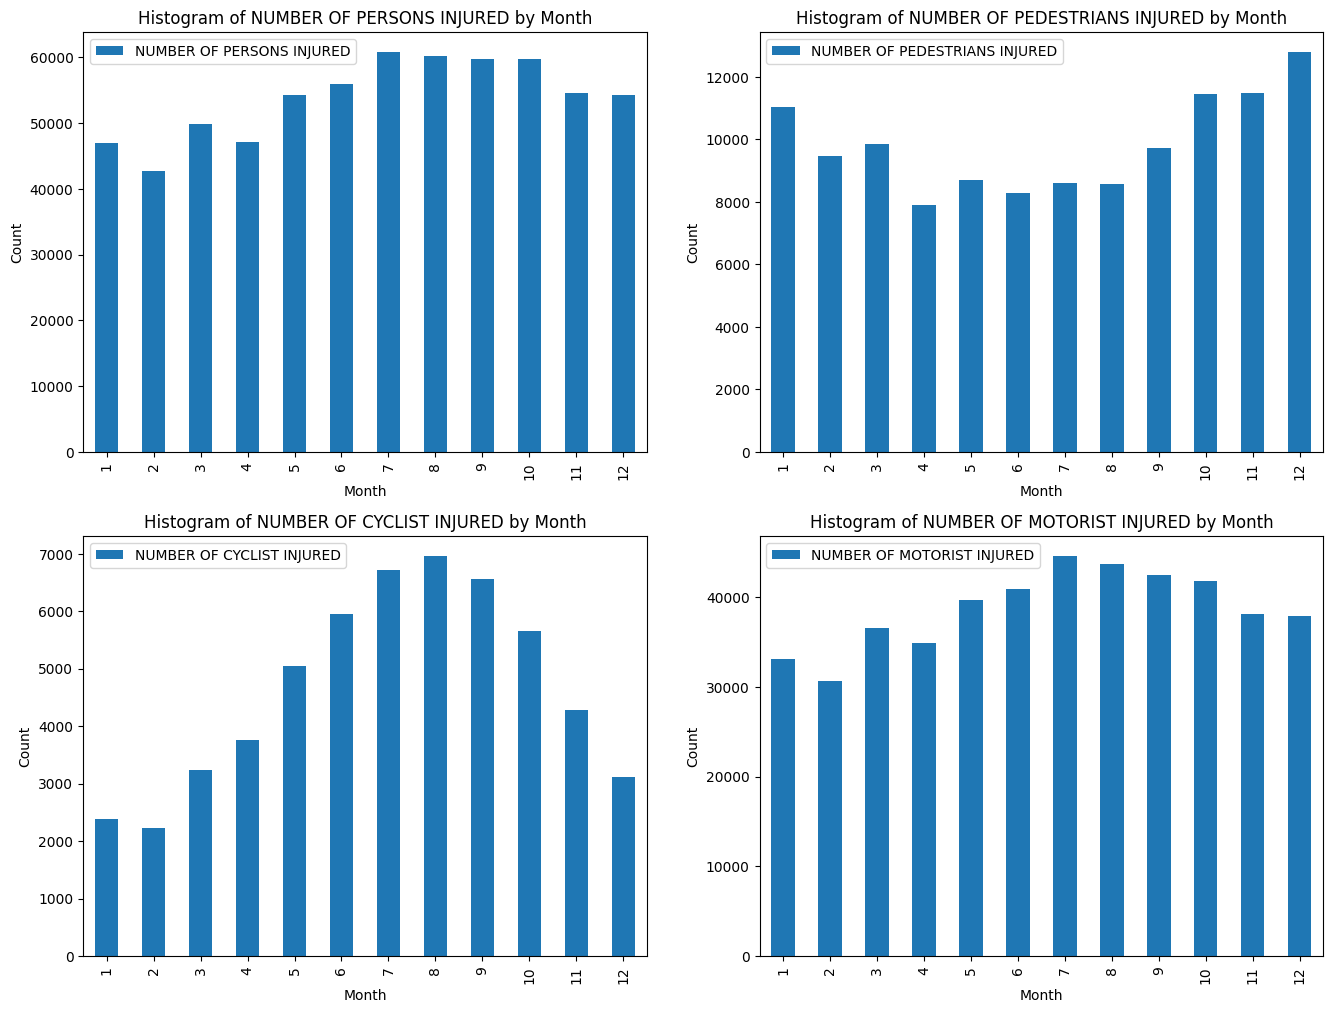

In [204]:
import matplotlib.pyplot as plt

# Create sets of categories
injuries = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']
killed = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']

# Create a figure and axes for the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot histograms for injuries
for i, ax in zip(injuries, axs.flatten()):
    df.groupby(['Month'])[i].sum().plot(kind='bar', ax=ax, label=i)
    ax.set_title(f'Histogram of {i} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.legend()



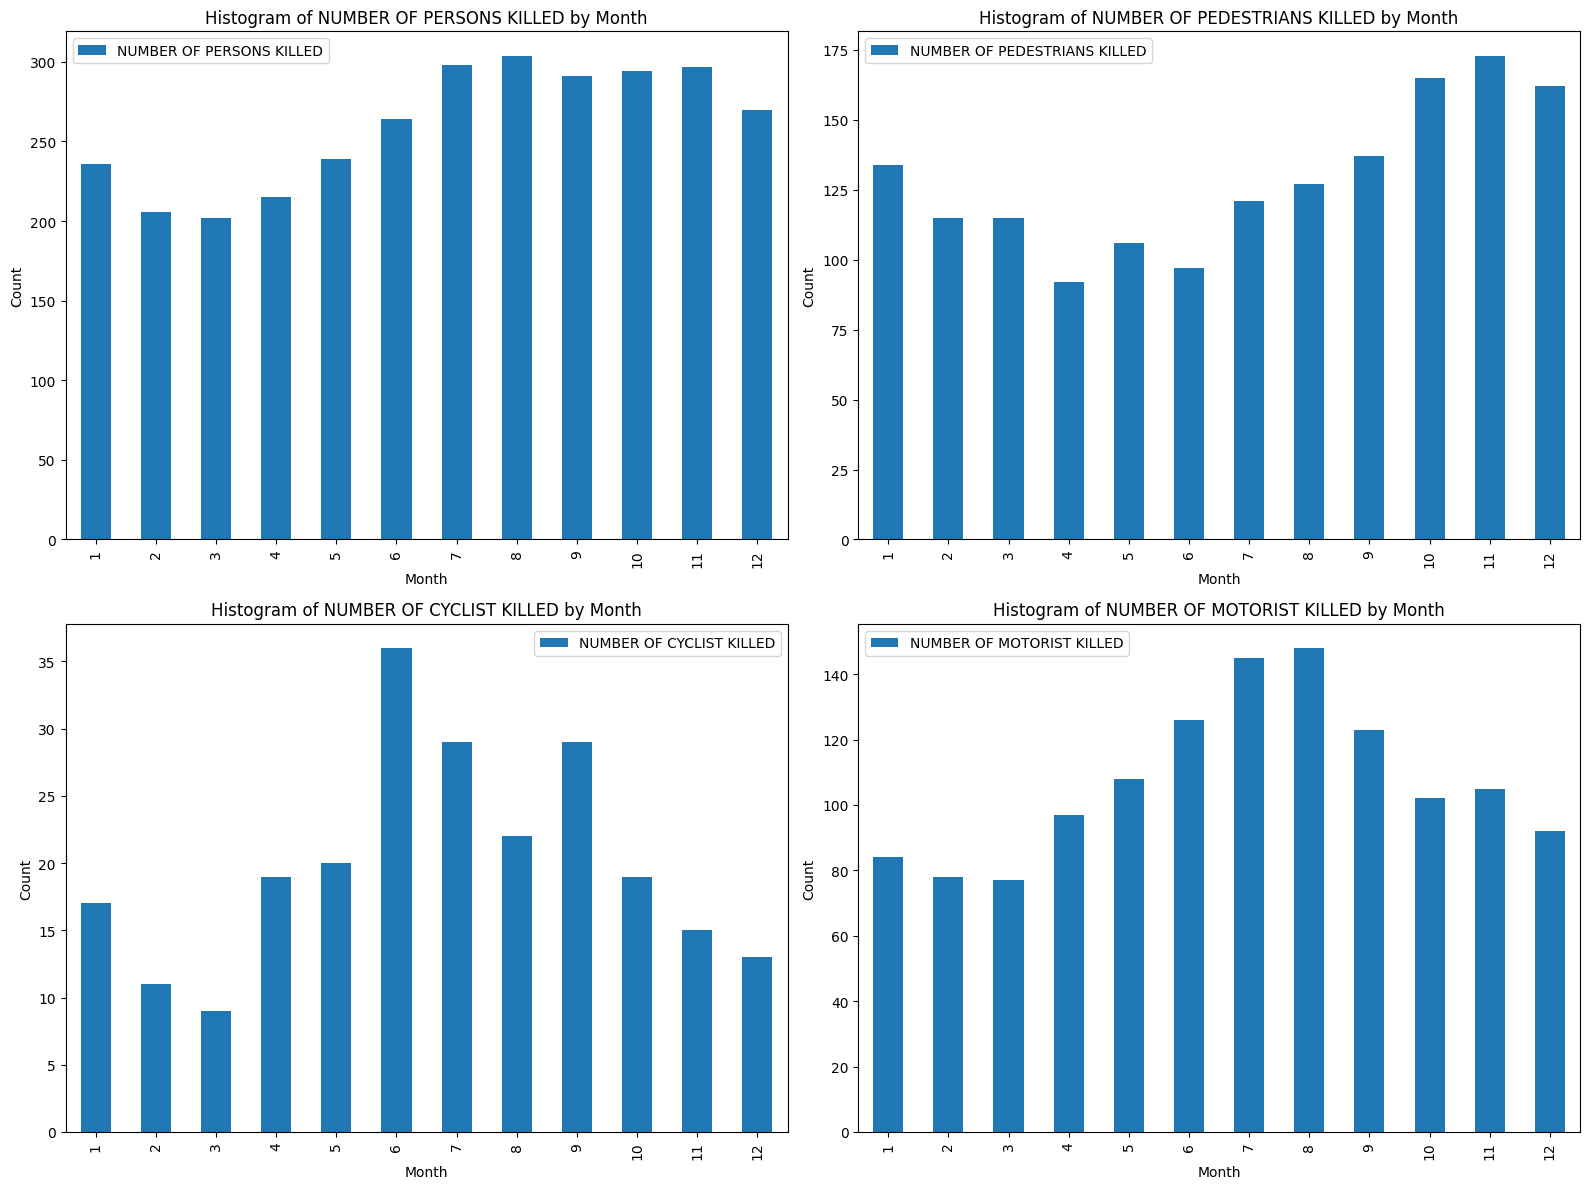

In [205]:
# Create a figure and axes for the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# Plot histograms for killed
for j, ax in zip(killed, axs.flatten()):
    df.groupby(['Month'])[j].sum().plot(kind='bar', ax=ax, label=j)
    ax.set_title(f'Histogram of {j} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



<Figure size 3500x2000 with 0 Axes>

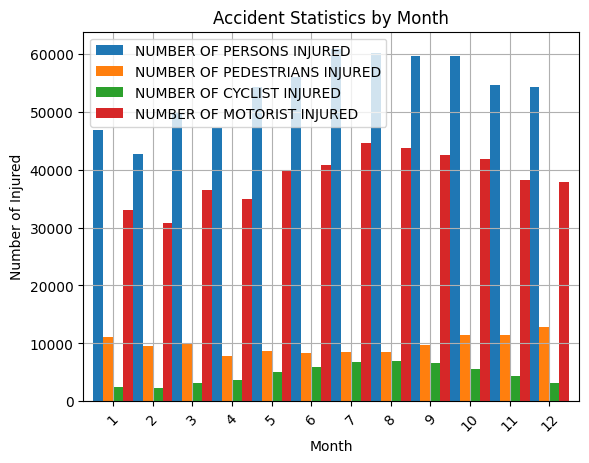

In [206]:
m=df.groupby(['Month'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF CYCLIST INJURED',
       'NUMBER OF MOTORIST INJURED'
       ]].sum()

# Plot the DataFrame D
plt.figure(figsize=(35, 20))  # Set the figsize to (12, 8)
m.plot(kind='bar', stacked=False,width=1.0)  # Plot a stacked bar plot
plt.title('Accident Statistics by Month')
plt.xlabel('Month')
plt.ylabel('Number of Injured')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.legend(title='Accident Type')  # Add a legend with a title
plt.grid(True)  # Add gridlines to the plot
plt.show()

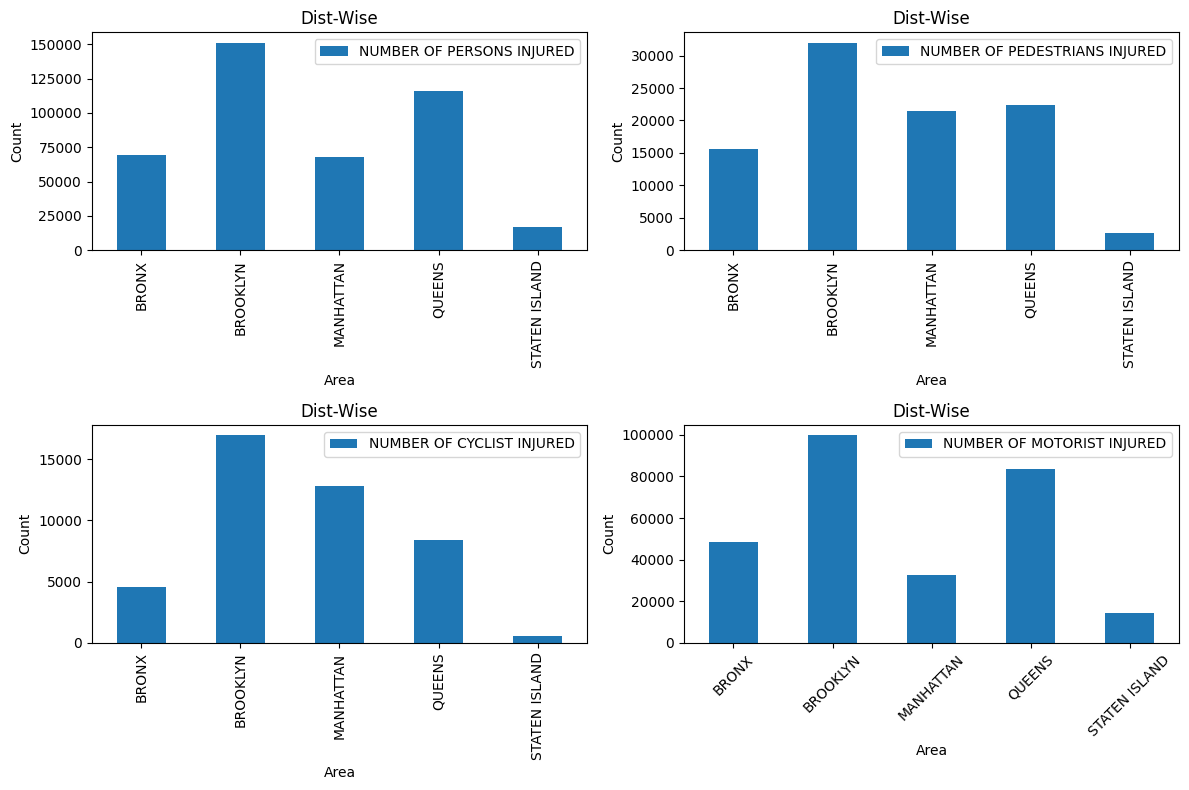

In [207]:
import matplotlib.pyplot as plt

# Create sets of categories
injuries = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']
killed = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']

# Create a figure and axes for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for injuries
for i, ax in zip(injuries, axs.flatten()):
    df.groupby(['BOROUGH'])[i].sum().plot(kind='bar', ax=ax, label=i)
    ax.set_title(f'Dist-Wise')
    ax.set_xlabel('Area')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    ax.legend()
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

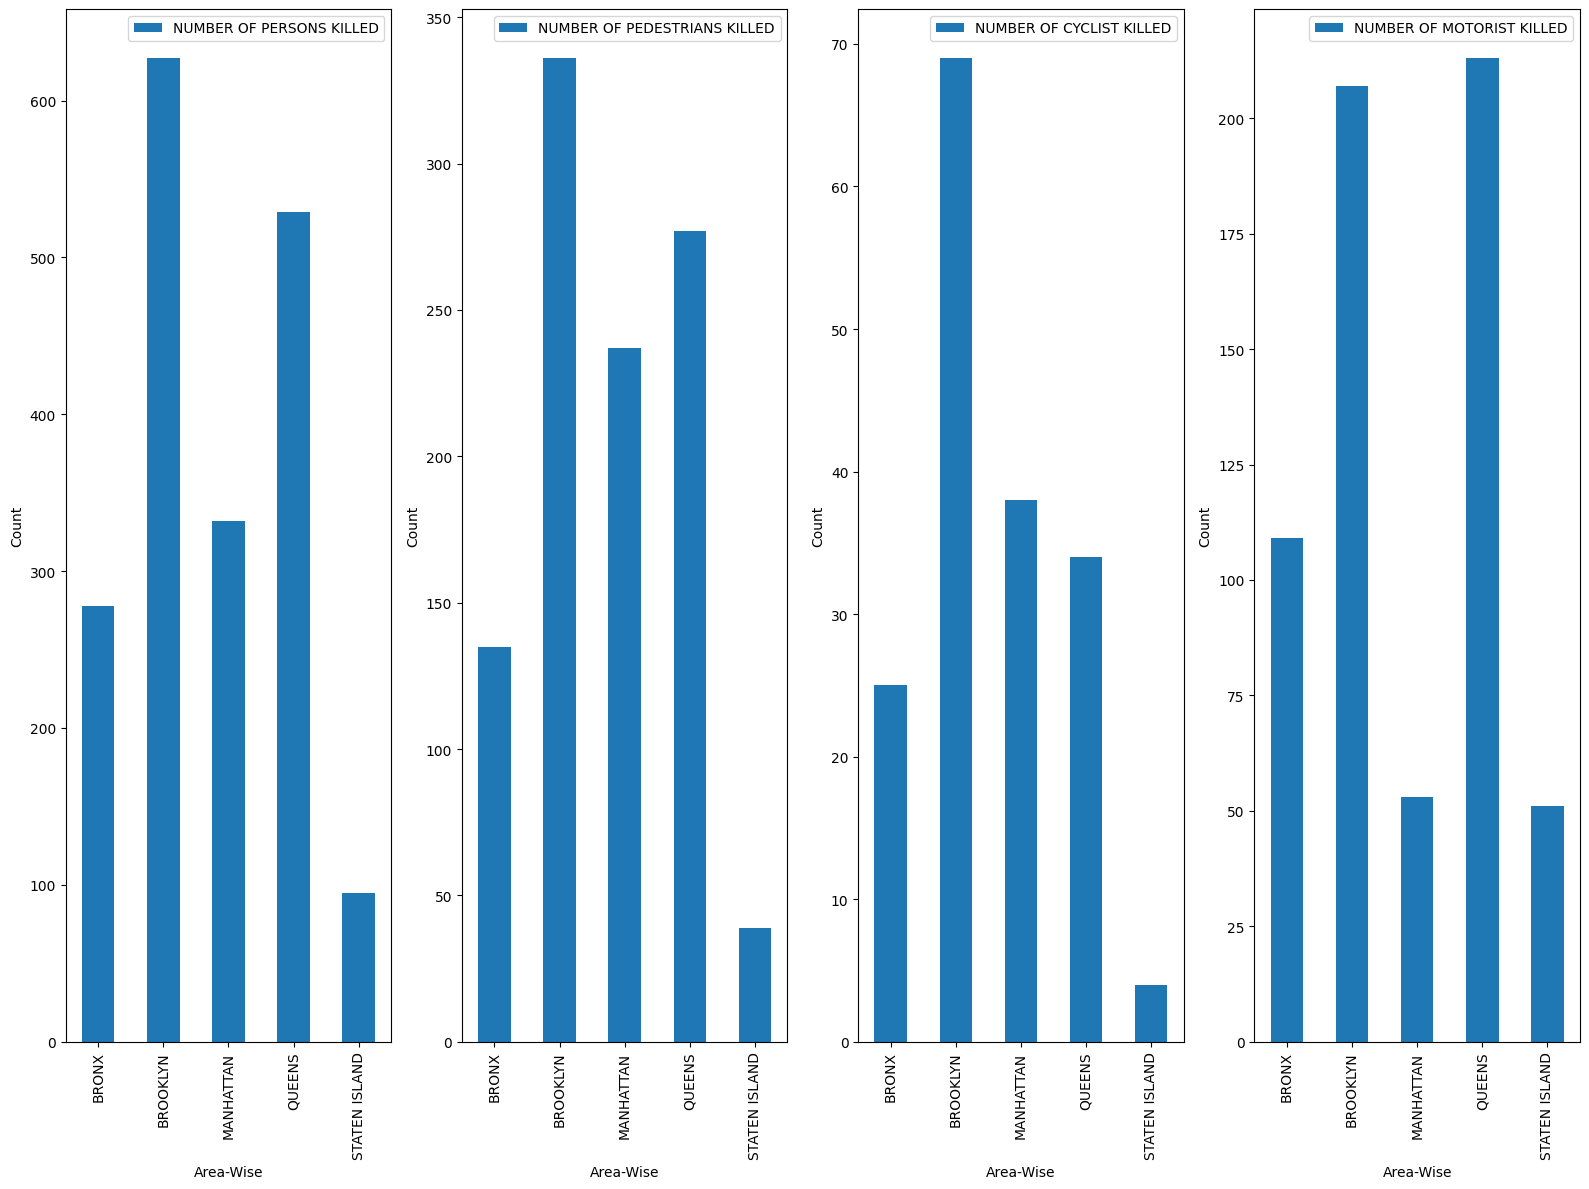

In [208]:
# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 12))
# Plot histograms for killed
for j, ax in zip(killed, axs.flatten()):
    df.groupby(['BOROUGH'])[j].sum().plot(kind='bar', ax=ax, label=j)
    ax.set_title(f'')
    ax.set_xlabel('Area-Wise')
    ax.set_ylabel('Count')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [209]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Group by 'CONTRIBUTING FACTOR VEHICLE 1' and sum the counts of 'NUMBER OF PERSONS INJURED' and 'NUMBER OF PERSONS KILLED'
# d = df.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()
# # Reset index to make 'CONTRIBUTING FACTOR VEHICLE 1' a column again
# d = d.reset_index()

# # Plot count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(data=d, x='CONTRIBUTING FACTOR VEHICLE 1')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.title('Count of CONTRIBUTING FACTOR VEHICLE 1')
# plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1')
# plt.ylabel('Count')


In [210]:
# Define a mapping dictionary to group contributing factors into broader categories
factor_mapping = {
    'Failure to Yield Right-of-Way': 'Traffic Violation',
    'Traffic Control Disregarded': 'Traffic Violation',
    'Unsafe Lane Changing': 'Traffic Violation',
    'Unsafe Speed': 'Traffic Violation',
    'Driver Inattention/Distraction': 'Driver Distraction',
    'Following Too Closely': 'Driver Distraction',
    'Passing or Lane Usage Improper': 'Driver Error',
    'Turning Improperly': 'Driver Error',
    'Passing Too Closely': 'Driver Error',
    'Driver Inexperience': 'Driver Error',
    'Reaction to Uninvolved Vehicle': 'Driver Error',
    'Pavement Slippery': 'Road Condition',
    'Obstruction/Debris': 'Road Condition',
    'Glare': 'Road Condition',
    'View Obstructed/Limited': 'Road Condition',
    'Other Vehicular': 'Other',
    'Unspecified': 'Other',
    'Alcohol Involvement': 'Impairment',
    'Drugs (illegal)': 'Impairment',
    'Drugs (Illegal)': 'Impairment',  # Handling case variations
    'Fatigued/Drowsy': 'Physical Condition',
    'Illnes': 'Physical Condition',  # Correcting misspelling
    'Lost Consciousness': 'Physical Condition',
    'Fell Asleep': 'Physical Condition',
    'Illness': 'Physical Condition',  # Handling case variations
    'Other Lighting Defects': 'Vehicle Defect',
    'Brakes Defective': 'Vehicle Defect',
    'Tire Failure/Inadequate': 'Vehicle Defect',
    'Accelerator Defective': 'Vehicle Defect',
    'Steering Failure': 'Vehicle Defect',
    'Headlights Defective': 'Vehicle Defect',
    'Shoulders Defective/Improper': 'Vehicle Defect',
    'Windshield Inadequate': 'Vehicle Defect',
    'Other Electronic Device': 'Distraction',
    'Eating or Drinking': 'Distraction',
    'Cell Phone (hands-free)': 'Distraction',
    'Cell Phone (hand-Held)': 'Distraction',
    'Texting': 'Distraction',
    'Listening/Using Headphones': 'Distraction',
    'Using On Board Navigation Device': 'Distraction',
    'Outside Car Distraction': 'Distraction',
    'Passenger Distraction': 'Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Other',
    'Animals Action': 'Other',
    'Vehicle Vandalism': 'Other',
    'Driverless/Runaway Vehicle': 'Other',
    'Tow Hitch Defective': 'Other',
    'Prescription Medication': 'Other',
    '80': 'Other',  # Unclear category, assigned to 'Other'
    '1': 'Other',   # Unclear category, assigned to 'Other'
    'Pavement Defective': 'Other',  # Unclear category, assigned to 'Other'
    'Lane Marking Improper/Inadequate': 'Other',
    'Traffic Control Device Improper/Non-Working': 'Other',
    'Windshield Inadequate': 'Vehicle Defect',  # Handling duplication
    'Tire Failure/Inadequate': 'Vehicle Defect',  # Handling duplication
    '80': 'Other',  # Handling duplication
    'Drugs (Illegal)': 'Impairment'  # Handling duplication
}

# Apply the mapping to create a new column with merged contributing factors
df['Merged_Contributing_Factor'] = df['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_mapping)

# Display unique merged categories
merged_categories = df['Merged_Contributing_Factor'].unique()
print("Unique Merged Contributing Factors:")
print(merged_categories)

Unique Merged Contributing Factors:
[nan 'Road Condition' 'Driver Distraction' 'Other' 'Driver Error'
 'Traffic Violation' 'Vehicle Defect' 'Impairment' 'Physical Condition'
 'Distraction']


In [290]:
merged_categories

array(['Driver Error', 'Other', 'Impairment', 'Road Condition',
       'Traffic Violation', 'Driver Distraction', 'Physical Condition',
       'Vehicle Defect', nan, 'Distraction'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Road Condition'),
  Text(1, 0, 'Driver Distraction'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Driver Error'),
  Text(4, 0, 'Traffic Violation'),
  Text(5, 0, 'Vehicle Defect'),
  Text(6, 0, 'Impairment'),
  Text(7, 0, 'Physical Condition'),
  Text(8, 0, 'Distraction')])

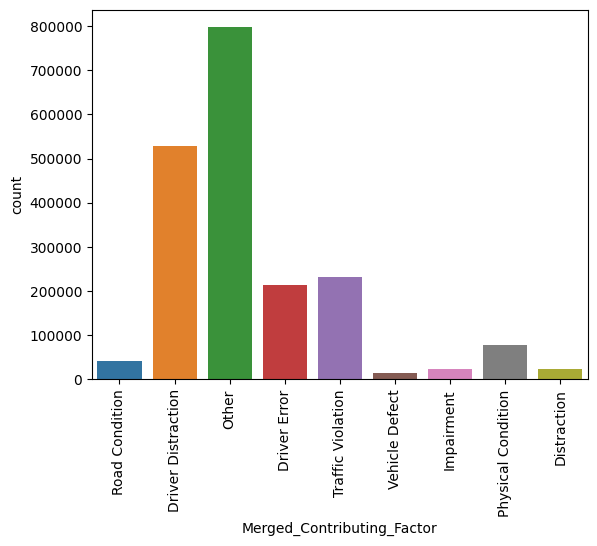

In [211]:
sns.countplot(data=df,x='Merged_Contributing_Factor')
plt.xticks(rotation=90)


In [212]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year,Month,Day,Merged_Contributing_Factor
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,9,11,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,4513547,Sedan,NaN,NaN,NaN,NaN,2022,3,26,Road Condition
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022,6,29,Driver Distraction
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,4456314,Sedan,NaN,NaN,NaN,NaN,2021,9,11,Other
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,4486609,NaN,NaN,NaN,NaN,NaN,2021,12,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081076,2024-03-05,17:22,QUEENS,11436.0,40.680477,-73.792100,"(40.680477, -73.7921)",SUTPHIN BOULEVARD,FOCH BOULEVARD,NaN,...,4707511,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2024,3,5,Traffic Violation
2081077,2024-03-05,17:00,BROOKLYN,11204.0,40.610786,-73.978820,"(40.610786, -73.97882)",NaN,NaN,161 AVENUE O,...,4707419,Ambulance,PK,Van,PK,NaN,2024,3,5,Driver Error
2081078,2024-03-03,17:50,NaN,NaN,40.675053,-73.947235,"(40.675053, -73.947235)",SAINT MARKS AVENUE,NaN,NaN,...,4707855,Station Wagon/Sport Utility Vehicle,PK,NaN,NaN,NaN,2024,3,3,NaN
2081079,2024-03-05,14:30,BROOKLYN,11207.0,40.677900,-73.892586,"(40.6779, -73.892586)",MILLER AVENUE,FULTON STREET,NaN,...,4707872,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2024,3,5,NaN


# Drop  Non-Relevant Columns 


In [213]:
df.drop(columns=['OFF STREET NAME','LATITUDE','LONGITUDE','LOCATION','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4',
                'CONTRIBUTING FACTOR VEHICLE 5','COLLISION_ID','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4',
                'VEHICLE TYPE CODE 5'],axis=1,inplace=True)

In [214]:
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          647518
ZIP CODE                         647769
ON STREET NAME                   442197
CROSS STREET NAME                787354
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6837
CONTRIBUTING FACTOR VEHICLE 2    323067
VEHICLE TYPE CODE 1               13788
VEHICLE TYPE CODE 2              398574
Year                                  0
Month                                 0
Day                                   0
Merged_Contributing_Factor       128946
dtype: int64

# Drop Missing Values with columns Having Highest
**By this way we can check the null values after droping each column rows and if they are reducing in other columns also we can say that most of the null values are with similar rows in all columns**

In [215]:
import pandas as pd

# Assuming df is your DataFrame and ''CROSS STREET NAME' is the name of the column
column_to_clean = 'CROSS STREET NAME'

# Drop rows with NaN values in the specified column
df_cleaned = df.dropna(subset=[column_to_clean])

# Now df_cleaned contains rows without NaN values in the specified column


In [216]:
#Print the Data after droping and check for rows, columns
df_cleaned

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
0,2021-09-11,2:39,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,Sedan,Sedan,2021,9,11,NaN
4,2021-12-14,8:13,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,...,0,0,NaN,NaN,NaN,NaN,2021,12,14,NaN
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
12,2021-12-14,8:30,NaN,NaN,broadway,west 80 street -west 81 street,0.0,0.0,0,0,...,0,0,Unsafe Lane Changing,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,14,Traffic Violation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081074,2024-03-05,14:00,NaN,NaN,CANAL STREET,AVENUE OF THE AMERICAS,1.0,0.0,0,0,...,1,0,Following Too Closely,Following Too Closely,Sedan,NaN,2024,3,5,Driver Distraction
2081075,2024-02-06,12:37,BROOKLYN,11235.0,OCEAN PARKWAY,AVENUE Z,1.0,0.0,1,0,...,0,0,Unspecified,NaN,E-Bike,NaN,2024,2,6,Other
2081076,2024-03-05,17:22,QUEENS,11436.0,SUTPHIN BOULEVARD,FOCH BOULEVARD,1.0,0.0,0,0,...,1,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2024,3,5,Traffic Violation
2081079,2024-03-05,14:30,BROOKLYN,11207.0,MILLER AVENUE,FULTON STREET,1.0,0.0,1,0,...,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Station Wagon/Sport Utility Vehicle,NaN,2024,3,5,NaN


In [217]:
df_cleaned.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          175986
ZIP CODE                         176144
ON STREET NAME                      346
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             5
NUMBER OF PERSONS KILLED             11
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      4418
CONTRIBUTING FACTOR VEHICLE 2    185027
VEHICLE TYPE CODE 1                8175
VEHICLE TYPE CODE 2              209580
Year                                  0
Month                                 0
Day                                   0
Merged_Contributing_Factor        73466
dtype: int64

In [218]:
import pandas as pd

# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'CONTRIBUTING FACTOR VEHICLE 2'

# Drop rows with NaN values in the specified column
df_cleaned1 = df_cleaned.dropna(subset=[column_to_clean])

# Now df_cleaned contains rows without NaN values in the specified column

In [219]:
df_cleaned1.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          153003
ZIP CODE                         153145
ON STREET NAME                      289
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              1
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
VEHICLE TYPE CODE 1                1635
VEHICLE TYPE CODE 2               45361
Year                                  0
Month                                 0
Day                                   0
Merged_Contributing_Factor        61253
dtype: int64

In [220]:
# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'ZIP CODE'

# Drop rows with NaN values in the specified column
df_cleaned2 = df_cleaned1.dropna(subset=[column_to_clean])


In [221]:
df_cleaned2.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
ON STREET NAME                       0
CROSS STREET NAME                    0
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
VEHICLE TYPE CODE 1               1404
VEHICLE TYPE CODE 2              38974
Year                                 0
Month                                0
Day                                  0
Merged_Contributing_Factor       53861
dtype: int64

In [222]:
df_cleaned2

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
14,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,...,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,2021,12,14,Driver Error
18,2021-12-11,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,11,Other
24,2021-12-13,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Sedan,Sedan,2021,12,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081063,2024-03-05,16:01,BROOKLYN,11221.0,STUYVESANT AVENUE,PULASKI STREET,1.0,0.0,0,0,...,1,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2024,3,5,Driver Distraction
2081067,2024-03-05,11:18,QUEENS,11105.0,21 STREET,22 ROAD,1.0,0.0,0,0,...,1,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,2024,3,5,Traffic Violation
2081071,2024-03-05,20:40,QUEENS,11375.0,YELLOWSTONE BOULEVARD,GERARD PLACE,0.0,0.0,0,0,...,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Tractor Truck Diesel,2024,3,5,Driver Distraction
2081076,2024-03-05,17:22,QUEENS,11436.0,SUTPHIN BOULEVARD,FOCH BOULEVARD,1.0,0.0,0,0,...,1,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2024,3,5,Traffic Violation


In [223]:
# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'VEHICLE TYPE CODE 2'

# Drop rows with NaN values in the specified column
df_cleaned3 = df_cleaned2.dropna(subset=[column_to_clean])


In [224]:
df_cleaned3.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
ON STREET NAME                       0
CROSS STREET NAME                    0
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
VEHICLE TYPE CODE 1                  2
VEHICLE TYPE CODE 2                  0
Year                                 0
Month                                0
Day                                  0
Merged_Contributing_Factor       51667
dtype: int64

****Here we can observe that by droping the 'CROSS STREET NAME','VEHICLE TYPE CODE 2','ZIP CODE','CONTRIBUTING FACTOR VEHICLE 1', all the missing values are deleted .
 now the data is cleaned and stored as df_cleaned3 #dataframe**

In [225]:
df_cleaned3['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(20)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       342887
Driver Inattention/Distraction    170047
Failure to Yield Right-of-Way      61311
Following Too Closely              33598
Other Vehicular                    31496
Backing Unsafely                   29722
Turning Improperly                 26813
Fatigued/Drowsy                    24720
Traffic Control Disregarded        21476
Passing or Lane Usage Improper     20606
Passing Too Closely                15066
Lost Consciousness                 14637
Driver Inexperience                14279
Unsafe Lane Changing               13014
Prescription Medication            12067
Alcohol Involvement                 9441
Unsafe Speed                        8664
Pavement Slippery                   7967
Physical Disability                 7160
Oversized Vehicle                   6576
Name: count, dtype: int64

In [226]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to examine
unique_categories = df_cleaned3['CONTRIBUTING FACTOR VEHICLE 1'].unique()

# Print or access the unique categories
print(unique_categories)


['Passing Too Closely' 'Turning Improperly'
 'Reaction to Uninvolved Vehicle' 'Unspecified'
 'Passing or Lane Usage Improper' 'Alcohol Involvement'
 'View Obstructed/Limited' 'Traffic Control Disregarded'
 'Driver Inattention/Distraction' 'Failure to Yield Right-of-Way'
 'Lost Consciousness' 'Following Too Closely' 'Unsafe Speed'
 'Other Vehicular' 'Brakes Defective' 'Backing Unsafely' 'Fell Asleep'
 'Aggressive Driving/Road Rage' 'Unsafe Lane Changing'
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'
 'Driver Inexperience' 'Animals Action' 'Pavement Slippery'
 'Obstruction/Debris' 'Oversized Vehicle' 'Pavement Defective'
 'Steering Failure' 'Illnes' 'Physical Disability' 'Glare'
 'Outside Car Distraction' 'Failure to Keep Right' 'Passenger Distraction'
 'Cell Phone (hands-free)' 'Lane Marking Improper/Inadequate'
 'Using On Board Navigation Device' 'Drugs (illegal)'
 'Accelerator Defective' 'Cell Phone (hand-Held)'
 'Traffic Control Device Improper/Non-Working' 'Headlights Def

**Grouping Categories in The Target column which has 57 to 9 which will be easy for model to train and classify**

In [227]:
# Define a mapping dictionary to group contributing factors into broader categories
factor_mapping = {
    'Failure to Yield Right-of-Way': 'Traffic Violation',
    'Traffic Control Disregarded': 'Traffic Violation',
    'Unsafe Lane Changing': 'Traffic Violation',
    'Unsafe Speed': 'Traffic Violation',
    'Driver Inattention/Distraction': 'Driver Distraction',
    'Following Too Closely': 'Driver Distraction',
    'Passing or Lane Usage Improper': 'Driver Error',
    'Turning Improperly': 'Driver Error',
    'Passing Too Closely': 'Driver Error',
    'Driver Inexperience': 'Driver Error',
    'Reaction to Uninvolved Vehicle': 'Driver Error',
    'Pavement Slippery': 'Road Condition',
    'Obstruction/Debris': 'Road Condition',
    'Glare': 'Road Condition',
    'View Obstructed/Limited': 'Road Condition',
    'Other Vehicular': 'Other',
    'Unspecified': 'Other',
    'Alcohol Involvement': 'Impairment',
    'Drugs (illegal)': 'Impairment',
    'Drugs (Illegal)': 'Impairment',  # Handling case variations
    'Fatigued/Drowsy': 'Physical Condition',
    'Illnes': 'Physical Condition',  # Correcting misspelling
    'Lost Consciousness': 'Physical Condition',
    'Fell Asleep': 'Physical Condition',
    'Illness': 'Physical Condition',  # Handling case variations
    'Other Lighting Defects': 'Vehicle Defect',
    'Brakes Defective': 'Vehicle Defect',
    'Tire Failure/Inadequate': 'Vehicle Defect',
    'Accelerator Defective': 'Vehicle Defect',
    'Steering Failure': 'Vehicle Defect',
    'Headlights Defective': 'Vehicle Defect',
    'Shoulders Defective/Improper': 'Vehicle Defect',
    'Windshield Inadequate': 'Vehicle Defect',
    'Other Electronic Device': 'Distraction',
    'Eating or Drinking': 'Distraction',
    'Cell Phone (hands-free)': 'Distraction',
    'Cell Phone (hand-Held)': 'Distraction',
    'Texting': 'Distraction',
    'Listening/Using Headphones': 'Distraction',
    'Using On Board Navigation Device': 'Distraction',
    'Outside Car Distraction': 'Distraction',
    'Passenger Distraction': 'Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Other',
    'Animals Action': 'Other',
    'Vehicle Vandalism': 'Other',
    'Driverless/Runaway Vehicle': 'Other',
    'Tow Hitch Defective': 'Other',
    'Prescription Medication': 'Other',
    '80': 'Other',  # Unclear category, assigned to 'Other'
    '1': 'Other',   # Unclear category, assigned to 'Other'
    'Pavement Defective': 'Other',  # Unclear category, assigned to 'Other'
    'Lane Marking Improper/Inadequate': 'Other',
    'Traffic Control Device Improper/Non-Working': 'Other',
    'Windshield Inadequate': 'Vehicle Defect',  # Handling duplication
    'Tire Failure/Inadequate': 'Vehicle Defect',  # Handling duplication
    '80': 'Other',  # Handling duplication
    'Drugs (Illegal)': 'Impairment'  # Handling duplication
}

# Apply the mapping to create a new column with merged contributing factors
df_cleaned3['Merged_Contributing_Factor'] = df_cleaned3['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_mapping)

# Display unique merged categories
merged_categories = df_cleaned3['Merged_Contributing_Factor'].unique()
print("Unique Merged Contributing Factors:")
print(merged_categories)

Unique Merged Contributing Factors:
['Driver Error' 'Other' 'Impairment' 'Road Condition' 'Traffic Violation'
 'Driver Distraction' 'Physical Condition' 'Vehicle Defect' nan
 'Distraction']


In [228]:
df_cleaned3

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
14,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,...,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,2021,12,14,Driver Error
18,2021-12-11,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,11,Other
24,2021-12-13,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Sedan,Sedan,2021,12,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081063,2024-03-05,16:01,BROOKLYN,11221.0,STUYVESANT AVENUE,PULASKI STREET,1.0,0.0,0,0,...,1,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2024,3,5,Driver Distraction
2081067,2024-03-05,11:18,QUEENS,11105.0,21 STREET,22 ROAD,1.0,0.0,0,0,...,1,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,2024,3,5,Traffic Violation
2081071,2024-03-05,20:40,QUEENS,11375.0,YELLOWSTONE BOULEVARD,GERARD PLACE,0.0,0.0,0,0,...,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Tractor Truck Diesel,2024,3,5,Driver Distraction
2081076,2024-03-05,17:22,QUEENS,11436.0,SUTPHIN BOULEVARD,FOCH BOULEVARD,1.0,0.0,0,0,...,1,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2024,3,5,Traffic Violation


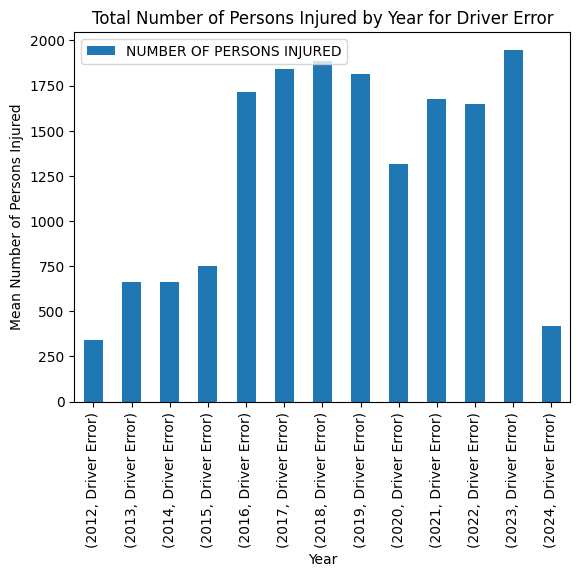

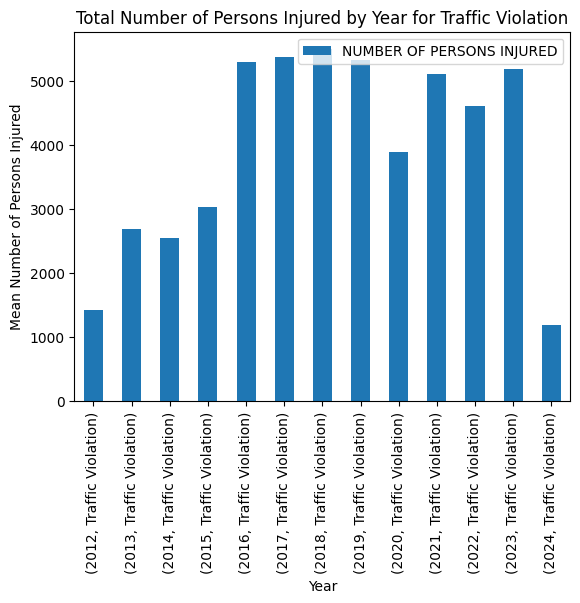

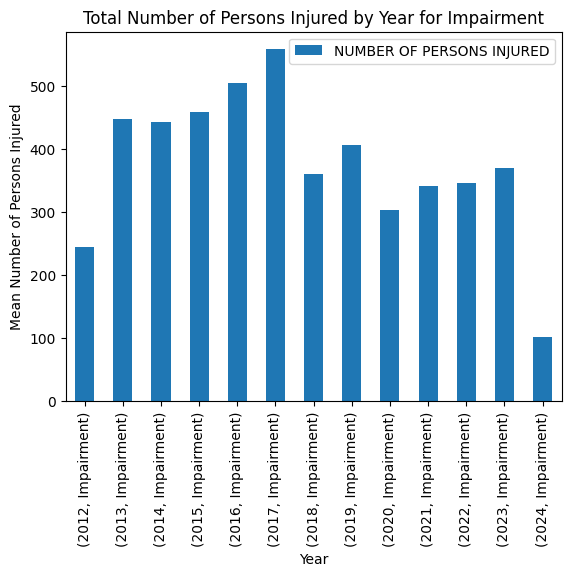

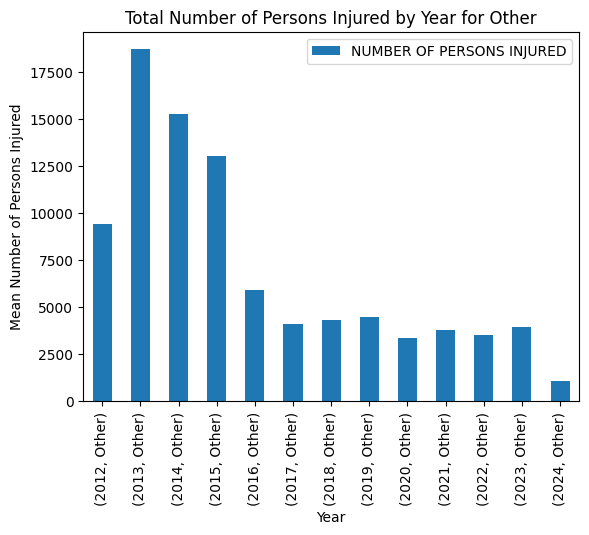

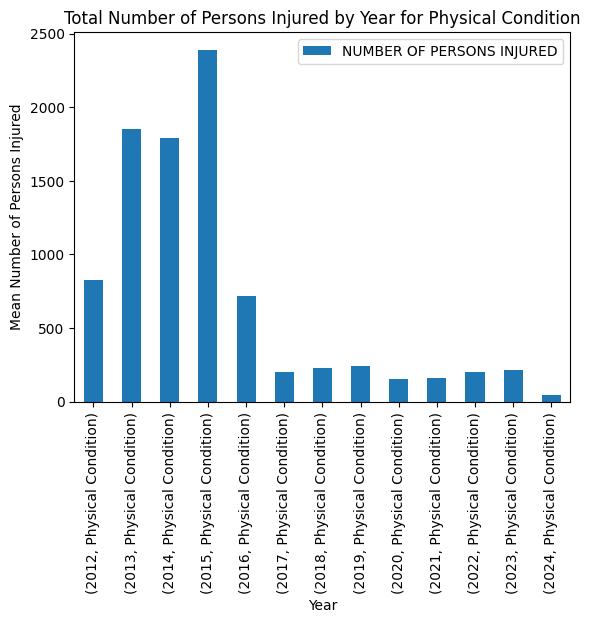

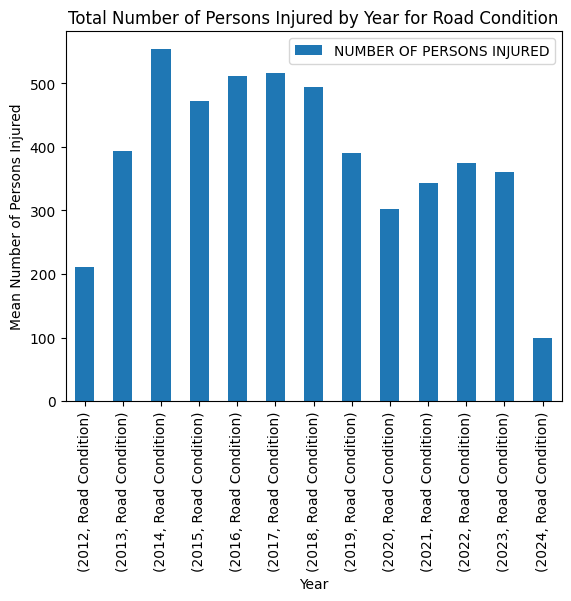

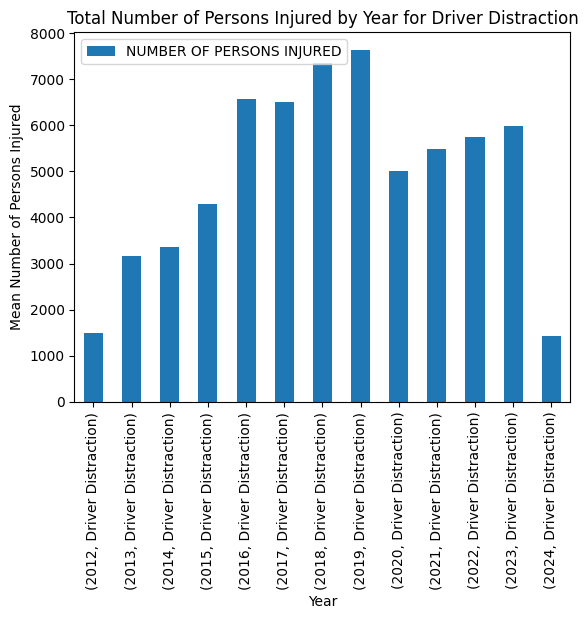

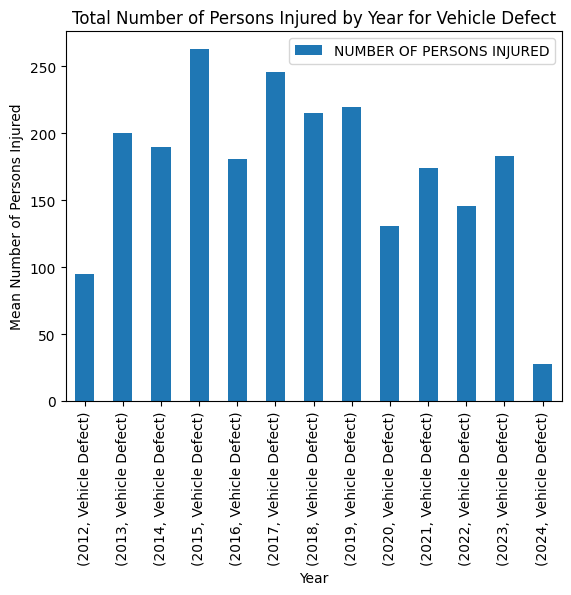

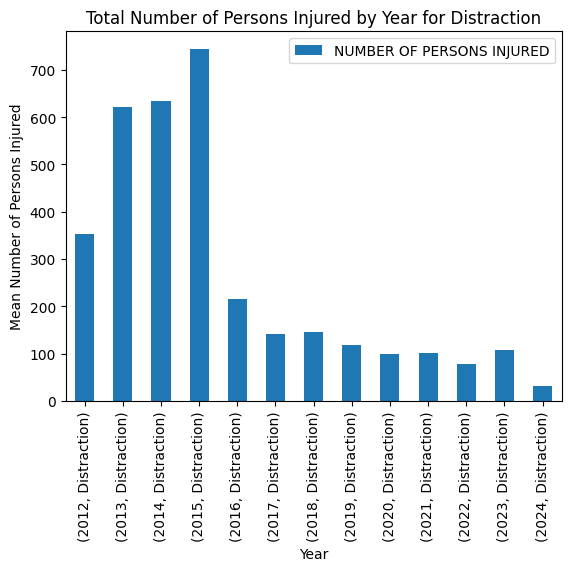

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Merged_Contributing_Factor' column
df_cleaned3 = df_cleaned3.dropna(subset=['Merged_Contributing_Factor'])

# Get the unique categories in the column 'Merged_Contributing_Factor'
categories = set(df_cleaned3['Merged_Contributing_Factor'])

# Iterate over the categories and plot graphs for each category
for category in categories:
    # Group by 'Year' and the current category, then calculate the mean of 'NUMBER OF PERSONS INJURED'
    y = df_cleaned3.groupby(['Year', 'Merged_Contributing_Factor'])[['NUMBER OF PERSONS INJURED']].sum().loc(axis=0)[:, category]
    
    # Plot the graph
    y.plot.bar(title=f'Total Number of Persons Injured by Year for {category}')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Persons Injured')
    plt.xticks(rotation=90)
    plt.show()


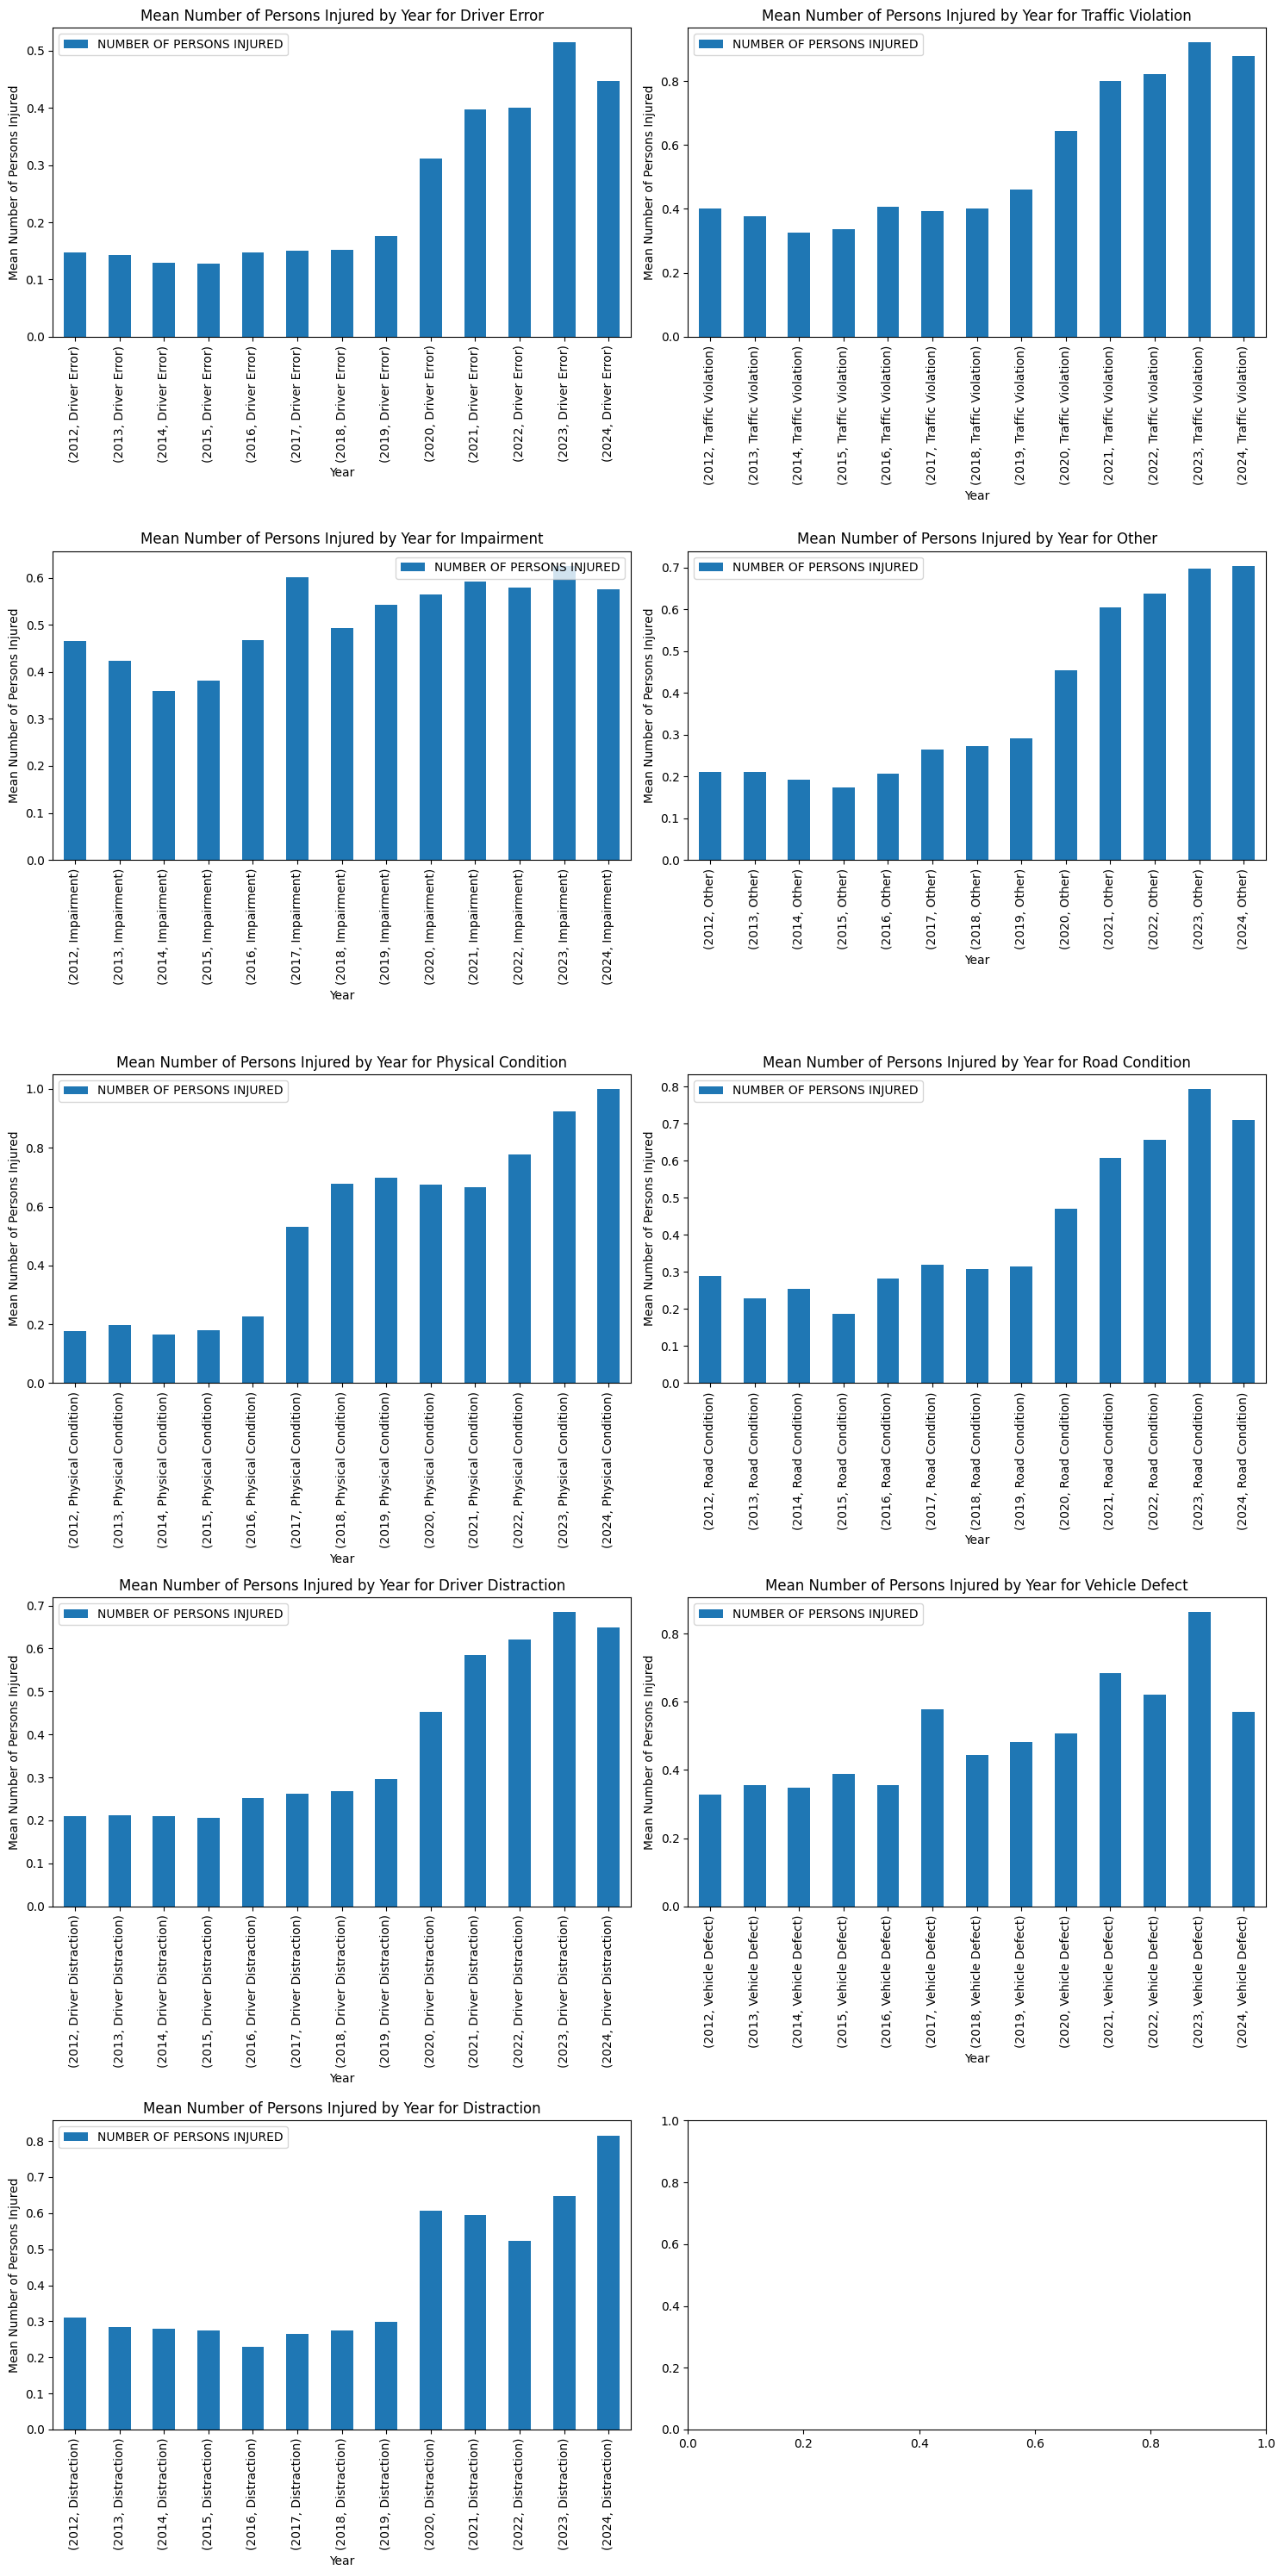

In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Merged_Contributing_Factor' column
df_cleaned3 = df_cleaned3.dropna(subset=['Merged_Contributing_Factor'])

# Get the unique categories in the column 'Merged_Contributing_Factor'
categories = set(df_cleaned3['Merged_Contributing_Factor'])

# Calculate the number of rows needed for the subplot
num_rows = (len(categories) + 1) // 2

# Create subplots with two columns
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))

# Iterate over the categories and plot graphs for each category
for i, category in enumerate(categories):
    # Calculate the row and column indices for the subplot
    row_idx = i // 2
    col_idx = i % 2

    # Group by 'Year' and the current category, then calculate the mean of 'NUMBER OF PERSONS INJURED'
    y = df_cleaned3.groupby(['Year', 'Merged_Contributing_Factor'])[['NUMBER OF PERSONS INJURED']].mean().loc(axis=0)[:, category]
    
    # Plot the graph in the corresponding subplot
    y.plot.bar(ax=axs[row_idx, col_idx], title=f'Mean Number of Persons Injured by Year for {category}')
    axs[row_idx, col_idx].set_xlabel('Year')
    axs[row_idx, col_idx].set_ylabel('Mean Number of Persons Injured')
    axs[row_idx, col_idx].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



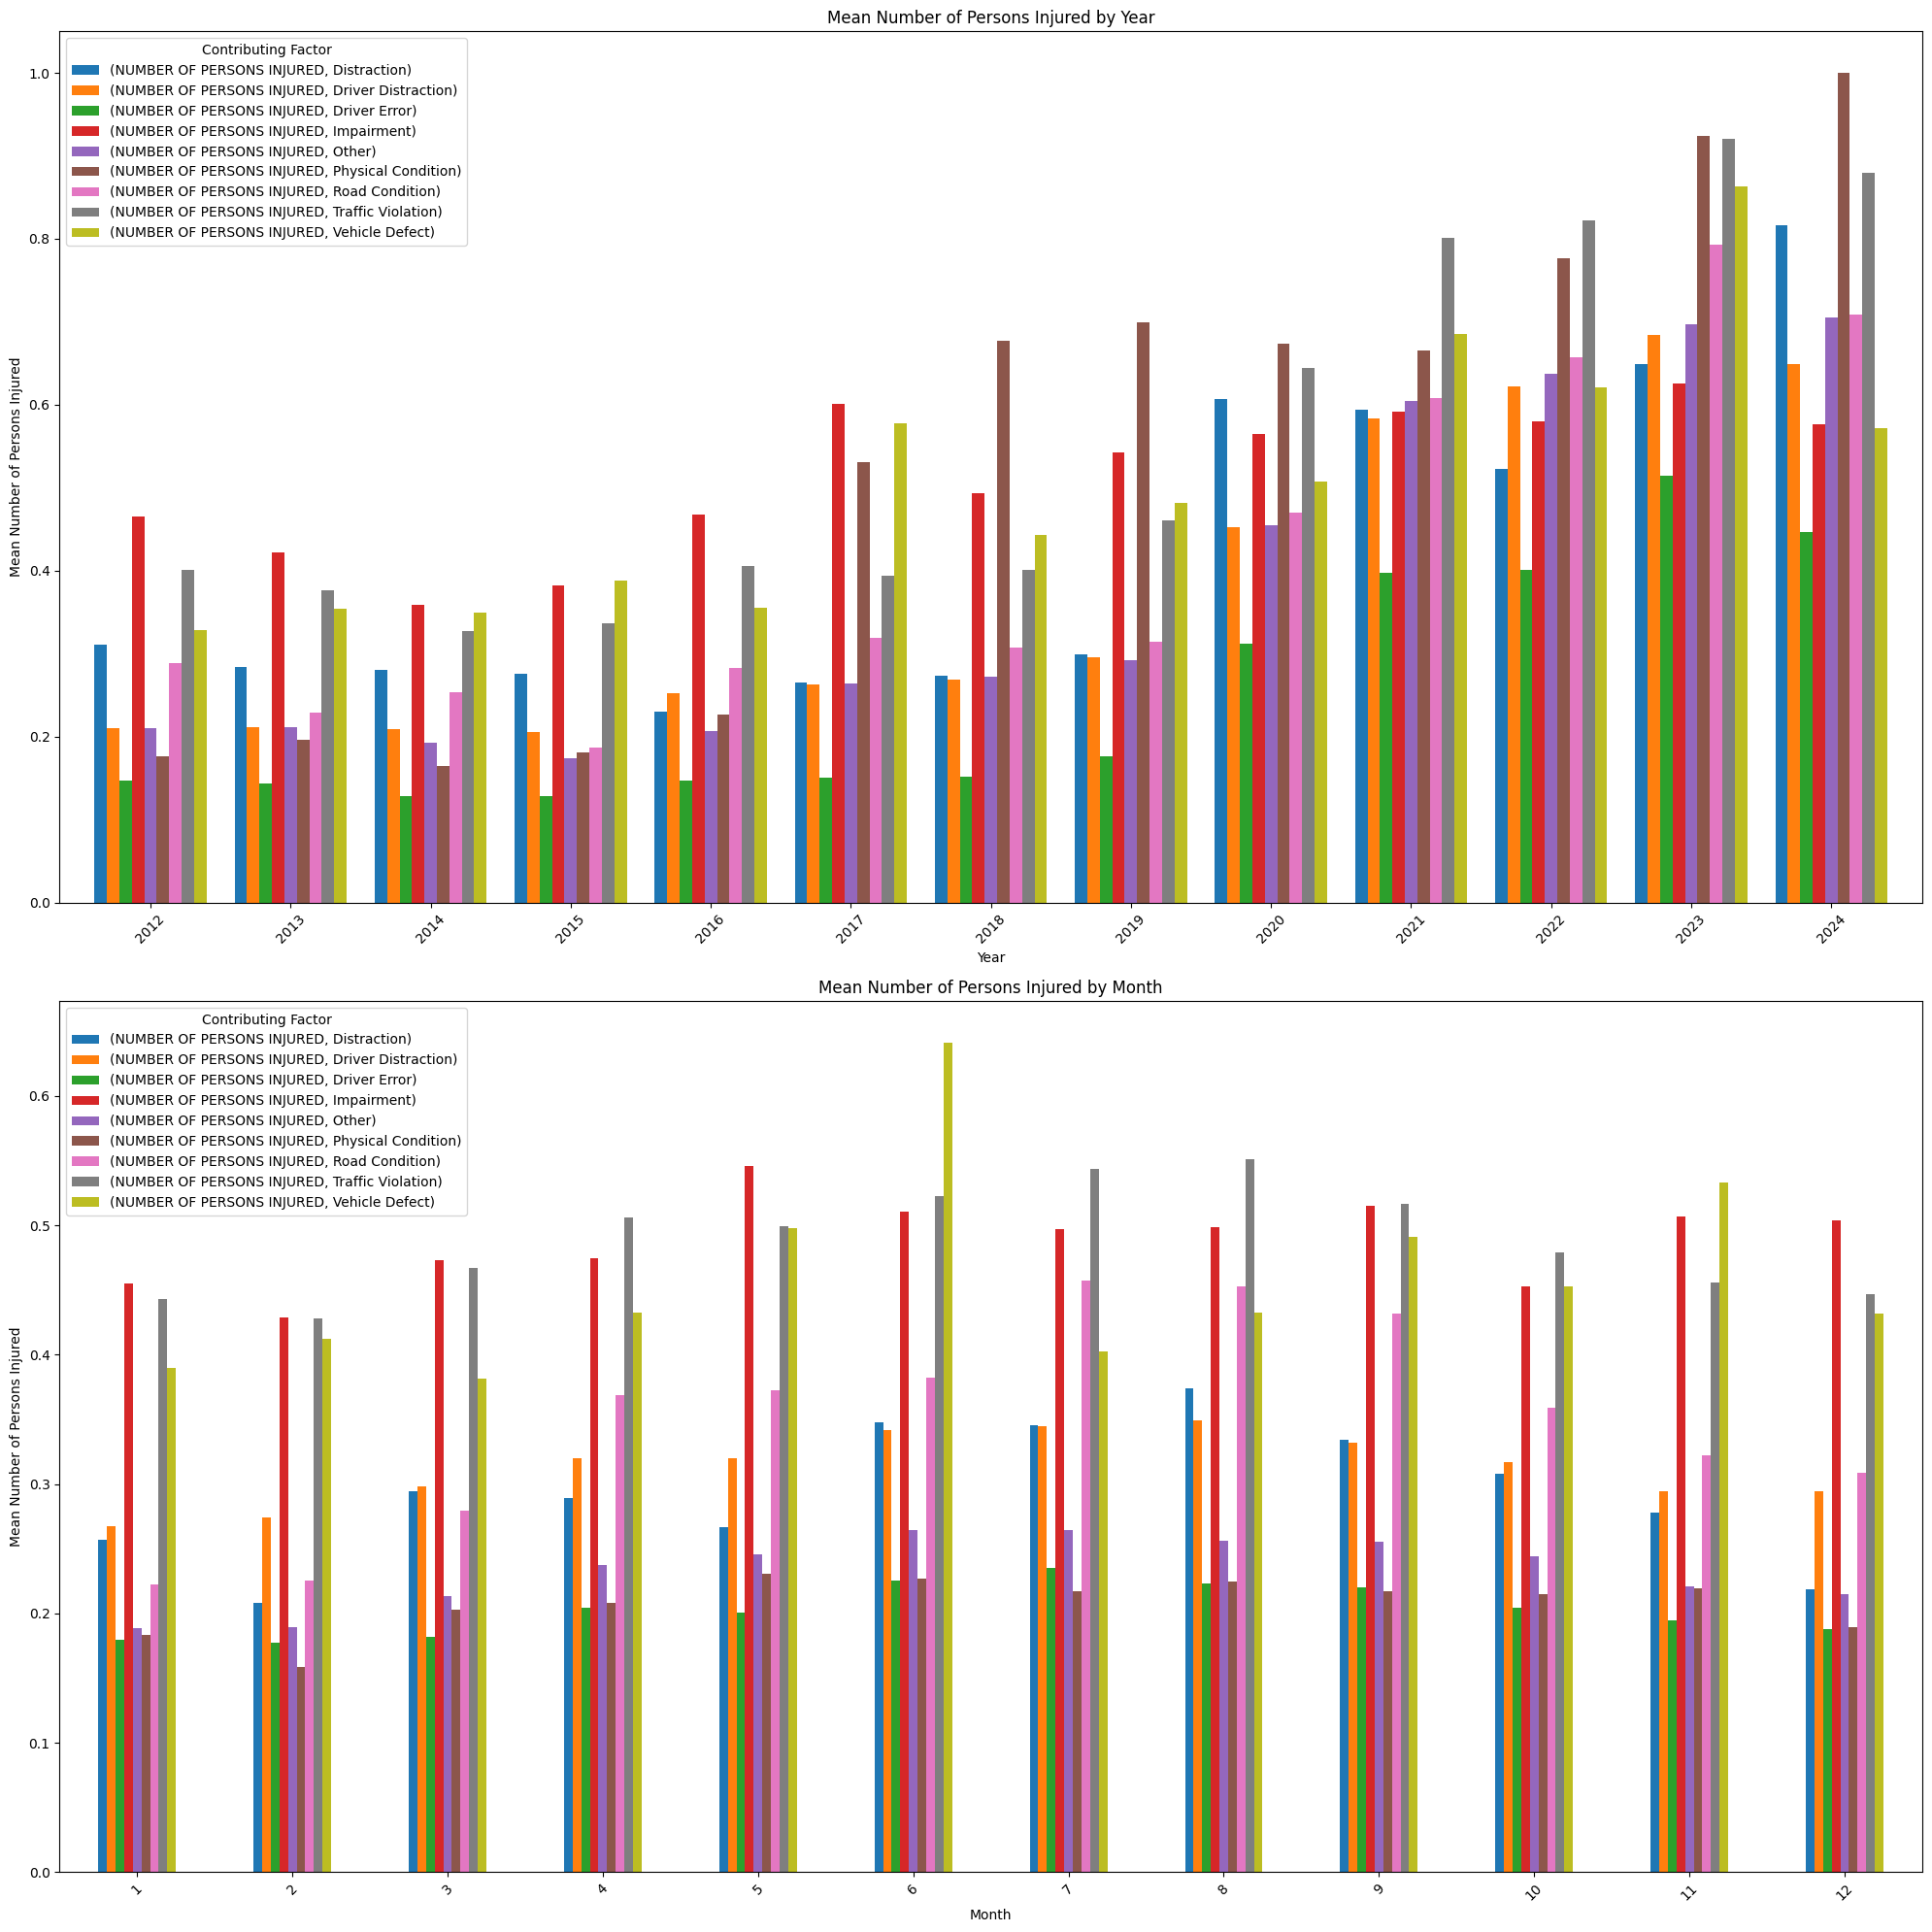

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of rows needed for the subplot
num_rows = 2

# Create subplots with two rows
fig, axs = plt.subplots(num_rows, 1, figsize=(20, 20))

# Plot for 'Year' data
y = df_cleaned3.groupby(['Year', 'Merged_Contributing_Factor'])[['NUMBER OF PERSONS INJURED']].mean()
y.unstack().plot(kind='bar', ax=axs[0], stacked=False,width=0.8)
axs[0].set_title('Mean Number of Persons Injured by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Mean Number of Persons Injured')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title='Contributing Factor')

# Plot for 'Month' data
m = df_cleaned3.groupby(['Month', 'Merged_Contributing_Factor'])[['NUMBER OF PERSONS INJURED']].mean()
m.unstack().plot(kind='bar', ax=axs[1], stacked=False)
axs[1].set_title('Mean Number of Persons Injured by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Mean Number of Persons Injured')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(title='Contributing Factor')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


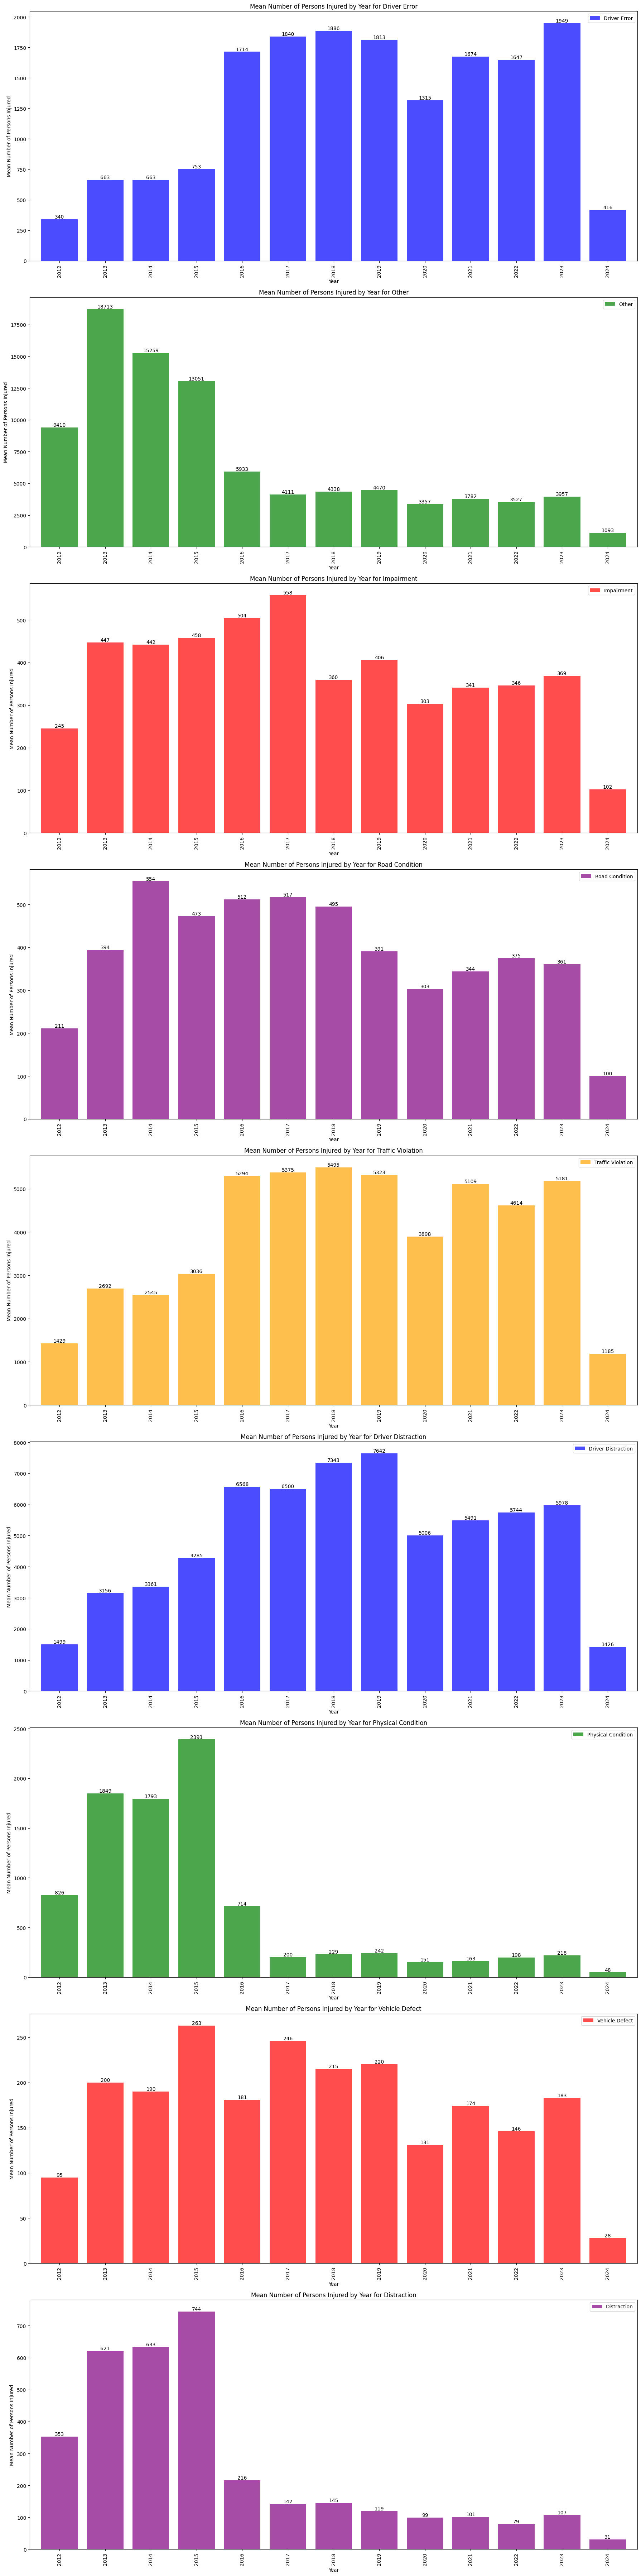

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Get unique categories of 'CONTRIBUTING FACTOR VEHICLE 1'
categories = df_cleaned3['Merged_Contributing_Factor'].unique()

# Create subplots with rows equal to the number of categories
num_categories = len(categories)
fig, axs = plt.subplots(num_categories, 1, figsize=(18, 8*num_categories))

# Define colors for each category
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot for each category
for i, category in enumerate(categories):
    # Filter dataframe for the current category
    category_df = df_cleaned3[df_cleaned3['Merged_Contributing_Factor'] == category]
    
    # Plot bar plot for 'NUMBER OF PERSONS INJURED'
    ax = category_df.groupby(['Year'])[['NUMBER OF PERSONS INJURED']].sum().plot.bar(ax=axs[i], color=colors[i % len(colors)], alpha=0.7, width=0.8)
    ax.set_title(f'Mean Number of Persons Injured by Year for {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Number of Persons Injured')
    ax.legend([category])
      # Annotate counts on each bar
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), 
                     ha='center', va='center',
                     xytext=(0, 5), 
                     textcoords='offset points')


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()




In [233]:
# def cont_visua(col):
#     fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,4))
#     sns.boxplot(data=df_cleaned3,x=col,ax=ax[0])
#     sns.histplot(data=df_cleaned3,x=col,kde=True,bins=20,ax=ax[1])
#     plt.subplots_adjust(wspace=0.6)

# cont_visua('NUMBER OF PERSONS INJURED')
# cont_visua('NUMBER OF PERSONS KILLED')
# cont_visua('NUMBER OF PEDESTRIANS INJURED')
# cont_visua('NUMBER OF PEDESTRIANS KILLED')
# cont_visua('NUMBER OF CYCLIST INJURED')
# cont_visua('NUMBER OF CYCLIST KILLED')
# cont_visua('NUMBER OF MOTORIST INJURED')
# cont_visua('NUMBER OF MOTORIST KILLED')


# Filtering the NUmerical Columns And Find Skewness

In [234]:
num = df_cleaned3.select_dtypes(include='number')
skewness = {}
for col in num.columns:
    skewness[col] = num[col].skew()
    print(skewness[col])

4.606035599348108
57.48935726618998
48.68336366417072
161.91007648028477
5.317100223563026
84.059119381163
4.9846368644659735
53.934303319989226
0.7080340083137732
-0.09015073889988091
0.026772790762290485


In [235]:
num.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'Year',
       'Month', 'Day'],
      dtype='object')

**There are Huge no of Outliers in NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED & NUMBER OF MOTORIST KILLED 
all are positively skewed  towards rightside**

In [236]:
num.shape

(864914, 11)

In [237]:
# dropped_col  = num.copy()

In [238]:
# dropped_col.drop(['NUMBER OF PEDESTRIANS INJURED',
#        'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
#        'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
#        'NUMBER OF MOTORIST KILLED','Year'],axis=1,inplace =True)

In [239]:
num = num.drop(['Year', 'Month', 'Day'],axis=1)

# APPLYING POWER TRANSFORMATION TO HANDLE OUTLIERS

In [240]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
num_transformed11 = transformer.fit_transform(num)

**Converting numerical tranformed data to data frame**

In [241]:
import pandas as pd

# Assuming num_transformed is your transformed array
# Convert the transformed array back to a DataFrame
num_transformed_df = pd.DataFrame(num_transformed11, columns=num.columns)

# Now num_transformed_df contains your transformed data in DataFrame format


In [242]:
num_transformed_df.skew()

NUMBER OF PERSONS INJURED         1.538587
NUMBER OF PERSONS KILLED         36.186574
NUMBER OF PEDESTRIANS INJURED    20.210784
NUMBER OF PEDESTRIANS KILLED     87.860533
NUMBER OF CYCLIST INJURED         5.163571
NUMBER OF CYCLIST KILLED         82.506789
NUMBER OF MOTORIST INJURED        1.891339
NUMBER OF MOTORIST KILLED        46.180061
dtype: float64

In [243]:
#check for outliers after transformations

<Axes: xlabel='NUMBER OF PEDESTRIANS KILLED'>

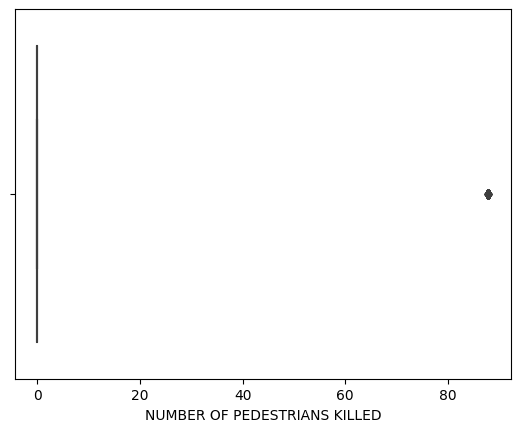

In [244]:
sns.boxplot(x='NUMBER OF PEDESTRIANS KILLED',data=num_transformed_df)

There are 1,2 null values in one or two columns so fill with 0

In [245]:
num_transformed_df['NUMBER OF PERSONS INJURED'] = num_transformed_df['NUMBER OF PERSONS INJURED'].fillna('0')
num_transformed_df['NUMBER OF PERSONS KILLED'] = num_transformed_df['NUMBER OF PERSONS KILLED'].fillna('0')

# Connverting into Normal Distribution 

**APPLY ROBUST SCALER WHICH WILL HANDLE OUTLIERS **

In [246]:
from sklearn.preprocessing import RobustScaler
encoder = RobustScaler()
num_transformed_df = encoder.fit_transform(num_transformed_df)
num_transformed_df = pd.DataFrame(num_transformed_df, columns=num.columns)

In [247]:
num_transformed_df.shape

(864914, 8)

<Axes: xlabel='NUMBER OF PEDESTRIANS KILLED', ylabel='Count'>

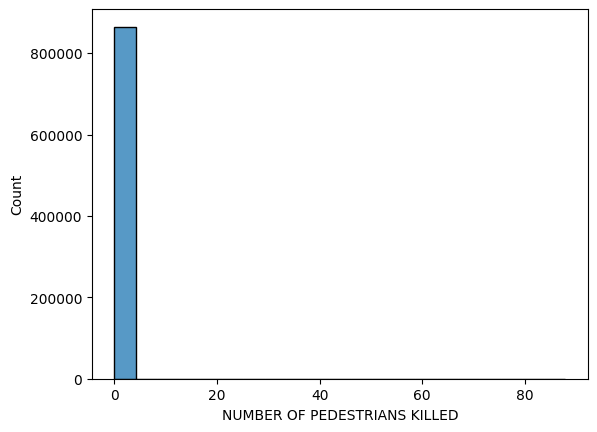

In [248]:
sns.histplot(x='NUMBER OF PEDESTRIANS KILLED',data=num_transformed_df)

<Axes: xlabel='NUMBER OF CYCLIST KILLED', ylabel='Count'>

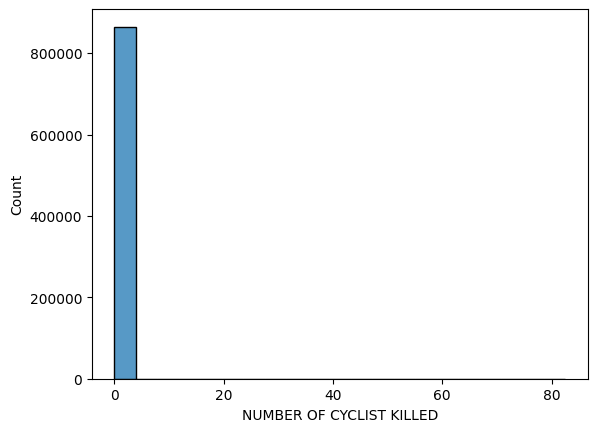

In [249]:
sns.histplot(x='NUMBER OF CYCLIST KILLED',data=num_transformed_df)

Whatever transformation you apply this skewness is not handled well so we will use most robust mmodel which will handle this outliers themselves like Ensemble methods .

# Filter the Categorical Columns 

In [250]:
cat = df_cleaned3.select_dtypes(include='O')
cat

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor
9,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error
11,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error
14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,Driver Error
18,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,Other
24,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,Unspecified,Unspecified,Sedan,Sedan,Other
...,...,...,...,...,...,...,...,...,...,...
2081063,16:01,BROOKLYN,11221.0,STUYVESANT AVENUE,PULASKI STREET,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Driver Distraction
2081067,11:18,QUEENS,11105.0,21 STREET,22 ROAD,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,Traffic Violation
2081071,20:40,QUEENS,11375.0,YELLOWSTONE BOULEVARD,GERARD PLACE,Driver Inattention/Distraction,Unspecified,Sedan,Tractor Truck Diesel,Driver Distraction
2081076,17:22,QUEENS,11436.0,SUTPHIN BOULEVARD,FOCH BOULEVARD,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Traffic Violation


In [251]:
df_cleaned3.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,...,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,...,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
14,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,...,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,2021,12,14,Driver Error
18,2021-12-11,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,11,Other
24,2021-12-13,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,...,1,0,Unspecified,Unspecified,Sedan,Sedan,2021,12,13,Other


Add the Year to Catagories to apply encoding

In [252]:
cat1 = pd.concat([cat,df_cleaned3['Year']],axis=1)

cat1

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year
9,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error,2021
11,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error,2021
14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,Driver Error,2021
18,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,Other,2021
24,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,Unspecified,Unspecified,Sedan,Sedan,Other,2021
...,...,...,...,...,...,...,...,...,...,...,...
2081063,16:01,BROOKLYN,11221.0,STUYVESANT AVENUE,PULASKI STREET,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Driver Distraction,2024
2081067,11:18,QUEENS,11105.0,21 STREET,22 ROAD,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,Traffic Violation,2024
2081071,20:40,QUEENS,11375.0,YELLOWSTONE BOULEVARD,GERARD PLACE,Driver Inattention/Distraction,Unspecified,Sedan,Tractor Truck Diesel,Driver Distraction,2024
2081076,17:22,QUEENS,11436.0,SUTPHIN BOULEVARD,FOCH BOULEVARD,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Traffic Violation,2024


In [253]:

#print the datatypes of columns in cat to check if any are in int or float so that we can convert them to string
cat1.dtypes


CRASH TIME                       object
BOROUGH                          object
ZIP CODE                         object
ON STREET NAME                   object
CROSS STREET NAME                object
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
VEHICLE TYPE CODE 1              object
VEHICLE TYPE CODE 2              object
Merged_Contributing_Factor       object
Year                              int32
dtype: object

In [254]:
df_cleaned3['Day'].value_counts()

Day
18    29306
13    29184
6     29171
7     29161
10    28963
20    28949
21    28920
3     28918
14    28898
8     28832
12    28787
11    28767
9     28764
16    28737
17    28726
5     28676
19    28616
15    28612
1     28603
22    28284
2     28274
24    28024
23    27958
4     27640
26    27596
28    27451
27    26880
25    26522
30    25651
29    25557
31    16487
Name: count, dtype: int64

# Encoding

In [255]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat1 = cat1.astype(str)

Categorcial_Final1=cat1.apply(le.fit_transform).reset_index()
# Categorcial_Final1.drop(['index'],axis=1)
Month=df_cleaned3['Month'].reset_index()
Day= df_cleaned3['Day'].reset_index()
Categorcial_Final = pd.concat([Categorcial_Final1,Month,Day],axis=1)

# Above I added month and day columns so that they are not scaled and encoded 

In [256]:
Categorcial_Final

,index,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year,index,Month,index,Day
0,9,358,2,32,986,5680,31,54,442,638,2,9,9,12,9,14
1,11,470,3,336,9780,5865,45,54,442,638,2,9,11,12,11,14
2,14,910,3,372,8127,483,37,54,442,623,2,9,14,12,14,14
3,18,643,0,155,11481,7378,48,54,454,623,4,9,18,12,18,11
4,24,520,4,107,10612,14146,48,54,442,623,4,9,24,12,24,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,2081063,421,1,242,9973,10659,8,54,454,638,1,12,2081063,3,2081063,5
864910,2081067,138,3,198,748,843,14,54,442,623,7,12,2081067,3,2081067,5
864911,2081071,760,3,322,11813,6816,8,54,442,683,1,12,2081071,3,2081071,5
864912,2081076,502,3,376,10025,6507,14,54,454,638,7,12,2081076,3,2081076,5


In [257]:
df_cleaned3['Month'].reset_index()

,index,Month
0,9,12
1,11,12
2,14,12
3,18,12
4,24,12
...,...,...
864909,2081063,3
864910,2081067,3
864911,2081071,3
864912,2081076,3


In [258]:
Categorcial_Final

,index,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year,index,Month,index,Day
0,9,358,2,32,986,5680,31,54,442,638,2,9,9,12,9,14
1,11,470,3,336,9780,5865,45,54,442,638,2,9,11,12,11,14
2,14,910,3,372,8127,483,37,54,442,623,2,9,14,12,14,14
3,18,643,0,155,11481,7378,48,54,454,623,4,9,18,12,18,11
4,24,520,4,107,10612,14146,48,54,442,623,4,9,24,12,24,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,2081063,421,1,242,9973,10659,8,54,454,638,1,12,2081063,3,2081063,5
864910,2081067,138,3,198,748,843,14,54,442,623,7,12,2081067,3,2081067,5
864911,2081071,760,3,322,11813,6816,8,54,442,683,1,12,2081071,3,2081071,5
864912,2081076,502,3,376,10025,6507,14,54,454,638,7,12,2081076,3,2081076,5


In [259]:
num_transformed_df

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2.555240,0.0,0.0,0.0,0.0,0.0,2.765641,0.0
3,2.509339,0.0,0.0,0.0,0.0,0.0,2.745343,0.0
4,2.509339,0.0,0.0,0.0,0.0,0.0,2.745343,0.0
...,...,...,...,...,...,...,...,...
864909,2.509339,0.0,0.0,0.0,0.0,0.0,2.745343,0.0
864910,2.509339,0.0,0.0,0.0,0.0,0.0,2.745343,0.0
864911,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
864912,2.509339,0.0,0.0,0.0,0.0,0.0,2.745343,0.0


# CONCAT NUMERICAL AND CATEGORICAL COLUMNS

In [260]:
final= pd.concat([num_transformed_df,Categorcial_Final],axis=1)

In [261]:

final.drop(['index'],axis=1,inplace=True)

In [262]:
final.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CRASH TIME',
       'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'Merged_Contributing_Factor', 'Year', 'Month', 'Day'],
      dtype='object')

In [263]:
final.shape

(864914, 21)

In [264]:
final['Merged_Contributing_Factor'].nunique()

9

# SEPARATE TARGET COLUMN  FROM INPUT FEATURES 

In [265]:

X = final.drop(['Merged_Contributing_Factor','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2'],axis=1)
y = final['Merged_Contributing_Factor']

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X.isnull().sum()


NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
Year                             0
Month                            0
Day                              0
dtype: int64

# SPLIT THE DATA INTO TRAIN & TEST 

In [268]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [269]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

# LOGISTIC REGRESSION MODEL

In [270]:
LG = LogisticRegression()
LG.fit(X_train,y_train)

LogisticRegression()

In [271]:
y_pred= LG.predict(X_test)

In [272]:
y_train.nunique()

9

In [273]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [274]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.45038635706715485
Precision: 0.45038635706715485
Recall: 0.45038635706715485
Confusion Matrix:
 [[     0    179      0      0   3221      0      0      0      0]
 [     0   1972      0      0  58581      0      0      0      0]
 [     0    976      0      0  23484      0      0      0      0]
 [     0     40      0      0   2919      0      0      0      0]
 [     0   2197      0      0 114892      0      0      0      0]
 [     0    170      0      0  13020      0      0      0      0]
 [     0    110      0      0   4541      0      0      0      0]
 [     0   1026      0      0  30659      0      0      0      0]
 [     0     38      0      0   1450      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3400
           1       0.29      0.03      0.06     60553
           2       0.00      0.00      0.00     24460
           3       0.00      0.00      0.00      2959
  

# RANDOM FOREST MODEL

In [275]:

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [276]:
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(X_train,y_train)
y_pred_100=rfc_100.predict(X_test)
print("accuracy_score",accuracy_score(y_test, y_pred_100))


accuracy_score 0.5244166104634358


In [277]:
import xgboost as xgb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBClassifier

# XG BOOST MODEL

In [278]:
from xgboost import XGBClassifier

# Initialize XGBClassifier for multiclass classification
xgb_classifier = XGBClassifier(objective='multi:softmax',  # for multiclass classification
                                num_class=9,  # specify the number of classes
                                colsample_bytree=0.6,
                                learning_rate=0.1,
                                max_depth=5,
                                alpha=0.1,
                                n_estimators=100,
                                eval_metric='mlogloss')

# Fit the XGBClassifier with your training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=9, ...)

In [279]:
y_pred = xgb_classifier.predict(X_test)

In [280]:
test_accuracy=accuracy_score(y_test,y_pred)

In [281]:
test_accuracy#testing accurcay

0.5260159938337027

In [282]:
train_acc = xgb_classifier.predict(X_train)

In [283]:
train__accuracy=accuracy_score(train_acc,y_train) 

In [284]:
train__accuracy#training accurcay

0.5292804064488743

In [285]:
# from sklearn.svm import SVC
# y_train = np.ravel(y_train)
# # Fit SVC model
# svr_rbf = SVC(kernel='rbf', C=100, gamma=0.1)
# svr_rbf.fit(X, y)


In [286]:
# import numpy as np
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split



# # Initialize XGBoost classifier for multiclass classification
# xgb_classifier = XGBClassifier(objective='multi:softmax',
#                                 num_class=9,
#                                 colsample_bytree=0.6,
#                                 learning_rate=0.1,
#                                 max_depth=5,
#                                 alpha=0.1,
#                                 n_estimators=100,
#                                 eval_metric='mlogloss')

# # Train the model
# eval_set = [(X_train, y_train), (X_test, y_test)]
# xgb_classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# # Get the training and testing log loss at each boosting round
# results = xgb_classifier.evals_result()

# # Extract training and testing log loss
# train_log_loss = results['validation_0']['mlogloss']
# test_log_loss = results['validation_1']['mlogloss']





# PLotting the training and testing accuracy curves

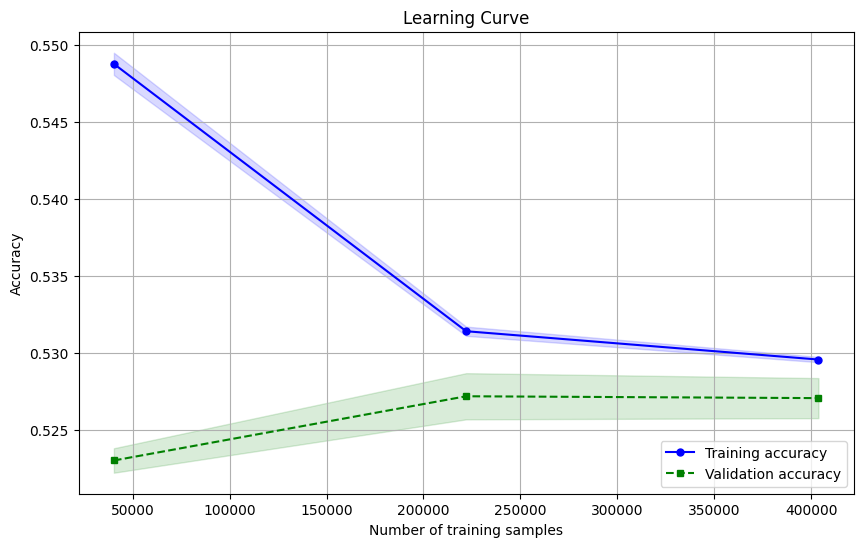

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, train_sizes=np.linspace(0.1, 1.0,3),cv=3):
    """
    Plots the learning curve for an estimator.

    Parameters:
        estimator: Estimator object implementing 'fit'
        X: Input features
        y: Target labels
        train_sizes: Array-like, sizes of the training set to use
        cv: Number of folds in cross-validation

#     Returns:
#         None (plots the learning curve)
#     """
    train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, Y, train_sizes=train_sizes, cv=cv, scoring='accuracy', shuffle=True)
    train_scores = train_scores
    test_scores = test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curve')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# # Example usage:
plot_learning_curve(xgb_classifier,X_train,y_train)
